<a id='top'></a>

# Assignment 1: Plotting Actions
##### Notebook for assignment 1 of 3 of the [Mathematical Modelling of Football](https://uppsala.instructure.com/courses/28112) course at [Uppsala University](https://www.uu.se/en), to evaluate passes using [StatsBomb](https://statsbomb.com/) event data abd corresponding OBV data, using [pandas](http://pandas.pydata.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster) for the [Mathematical Modelling of Football](https://uppsala.instructure.com/courses/28112) course at [Uppsala University](https://www.uu.se/en)

Notebook first written: 07/10/2022<br>
Notebook last updated: 07/10/2022

![Plotting Actions](../../img/fig/mathematical-modelling-of-football/evaluating_passesevaluating_passes_title.png)

![Uppsala University](../../img/logos/uppsala_university.png)

![Friends of Tracking](../../img/logos/FoTLogo.png)

![Edd Webster Analytics](../../img/edd_webster/edd_webster_analytics_logo_black_nobg.png)

![StatsBomb](../../img/logos/stats-bomb-logo.png)

Click [here](#section8) to jump straight to the Summary and skip the [Task Brief](#section2), [Data Sources](#section3), [Initial Data Handling](#section4), [Data Engineering](#section5), [Data Visualisation](#section6) sections.

A static version of this notebook can be found [here](https://nbviewer.org/github/mathematical-modelling-of-football/tree/main/notebooks/coach_id/30052022_orlando_pirates/) in the following GitHub repository [[link](https://github.com/mathematical-modelling-of-football/)]. For the custom functions used to create the visualisations that feature in this notebook, see the [scripts](https://github.com/mathematical-modelling-of-football/tree/main/scripts) folder.

---

## <a id='import_libraries'>Introduction</a>
This notebook parses pubicly available [StatsBomb](https://statsbomb.com/) Event data, using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![Edd Webster](../../img/edd_webster/fifa21eddwebsterbanner.png)

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/statsbomb/blob/main/notebooks/StatsBomb%20Data%20Engineering.ipynb). This notebook has an accompanying [`statsbomb`](https://github.com/eddwebster/statsbomb) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Read in the Datasets](#section3.2)<br>
      3.    [Join the Datasets](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
      2.    [Rename Columns](#section4.2)<br>
      3.    [Drop Duplicate Columns](#section4.3)<br>
      4.    [Sort the DataFrame](#section4.4)<br>
      3.    [Determine Each Player's Most Frequent Position](#section4.3)<br>
      6.    [Determine Each Player's Total Minutes Played](#section4.6)<br>
      7.    [Break Down All location Attributes](#section4.7)<br>
5.    [Summary](#section5)<br>
6.    [Next Steps](#section6)<br>
7.    [References](#section7)

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations.

### Import Libraries and Modules

In [1]:
# Import Libraries and Modules

## Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)

## Import Dependencies
%matplotlib inline

## Math Operations
import numpy as np
from math import pi

## Datetime
import datetime
from datetime import date
import time

## Reading Directories
import glob
import os
from pathlib import Path

## Data Preprocessing
import pandas as pd
import os
import re
import csv
import chardet
import random
from io import BytesIO

## Requests and downloads
import tqdm
import requests

## Working with JSON
import json
from pandas import json_normalize

## Data Visualisation
import matplotlib as mpl
#print(mpl.matplotlib_fname())
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#sorted(font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import matplotlib.colors
import matplotlib.image as image
from matplotlib import patches
from matplotlib.patches import Arc
from matplotlib.colors import ListedColormap
from matplotlib import font_manager
import seaborn as sns
from PIL import Image
import highlight_text
from highlight_text import HighlightText, ax_text, fig_text
from highlight_text import htext    # this one may now be obsolete
import missingno as msno
from mplsoccer.pitch import Pitch

## Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

## Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Print message
print('Libraries Imported')

Libraries Imported


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.9.7
NumPy: 1.20.3
pandas: 1.3.4
matplotlib: 3.4.3


### Defined Variables, Lists, and Dictionaries

In [3]:
# Defined variables

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

## Define project name
project_name = f'{today}_assignment_1_evaluating_passes'

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_statsbomb = os.path.join(base_dir, 'data', 'statsbomb')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_mmof = os.path.join(base_dir, 'img', 'fig', 'mathematical-modelling-of-football')
scripts_dir = os.path.join(base_dir, 'scripts')
fonts_dir = os.path.join(base_dir, 'fonts')

In [5]:
# Print fonts available
font_manager.findSystemFonts(fontpaths=fonts_dir)

['/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-Bold.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-SemiBoldItalic.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-SemiBold.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-ExtraLight.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-Regular.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-ExtraBoldItalic.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-Thin.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-BoldItalic.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-modelling-of-football/fonts/Montserrat-BlackItalic.ttf',
 '/Users/gbEddWeb/Documents/Personal/mathematical-mod

### Create Directory Structure

In [6]:
# Make the directory structure
for folder in ['combined', 'competitions', 'events', 'tactics', 'lineups', 'three-sixty']:
    
    ## Define file paths
    path_raw_data = os.path.join(data_dir_statsbomb, 'raw', 'data','data', folder)
    path_engineered_data = os.path.join(data_dir_statsbomb, 'engineered', folder)
    
    ## Create directories
    if not os.path.exists(path_raw_data):
        os.mkdir(os.path.join(path_raw_data))
    if not os.path.exists(path_engineered_data):
        os.mkdir(os.path.join(path_engineered_data))
    path = os.path.join(path_raw_data, folder)
    if not os.path.exists(path):
        os.mkdir(path)
    path = os.path.join(path_engineered_data, folder)
    if not os.path.exists(path):
        os.mkdir(path)
        
        
# Print message
print('Directories Created')

Directories Created


### Import Custom Libraries

In [7]:
# Import the custom libraries created to work with the StatsBomb event data

## Define the filepath of scripts
sys.path.insert(0, os.path.abspath(scripts_dir))

## Custom scripts to retrieve, engineer, analyse, and visualise the StatsBomb event data, created by Edd Webster for this analytical assignment
#import football_utils_statsbomb_data_eng as help_ed
#import football_utils_statsbomb_data_viz as help_viz


# Print message
print('Custom Libraries Imported')

Custom Libraries Imported


### Custom Functions

In [10]:
# Custom functions for downloading StatsBomb Open Data 

## Competitions
def load_file(season_id, getter="remote", path = None):
    resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/55/{season_id}.json")
    dict_season = json.loads(resp.text)
    df_season = json_normalize(dict_season, sep="_")
    return dict_season, df_season

## Match data
def load_match_file(match_id, getter="remote", path = None):
    resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")
    dict_match = json.loads(resp.text)
    df = json_normalize(dict_match, sep="_")
    return dict_match, df

## 360 data
def load_three_sixty_file(match_id, getter="remote", path = None):
    resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/three-sixty/{match_id}.json")
    dict_match = json.loads(resp.text)
    df = json_normalize(dict_match, sep="_")
    return dict_match, df


# Print message
print('Custom Functions Imported')

Custom Functions Imported


### Notebook Settings

In [11]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 1_000)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. About this Notebook</a>

<a id='section2.1'></a>

### <a id='#section2.1'>2.1. Assignment Brief</a>

> <b>The exercise</b>
> 1.    Think of a player who you enjoyed watching at the recent Men's Euros 2020 or Women's Euros 2022.
> 2.    What actions did they perform that were important and why?
> 3.    Plot the actions and describe how the data supports or contradicts your own analysis.
> 4.    Collect some statistics on that player for the tournament and put them in context. 
> 5.    Write a short text using at most two figures that illustrate your point.
> 
> The hand-in should be at most two pages, including figures. Submit one file only.
> 
> This is a graded exercise. 8/50 points in the final grade. (plus 2/50 for reviews).
> 
> Join the [Slack group](https://join.slack.com/t/mathematicalm-fhj6138/shared_invite/zt-ntybfac5-VSBuVC9aUyJJSk5qfkJjWQ) or the course to discuss this exercise.
> 
> Post a draft of your exercise to the Slack group on Monday 5th for feedback on Wednesday 7th.
<br><br>
>
> <b>The peer reviews</b>
>
> You review 3 of your peers submissions. You should write one or two sentences about each of:
> 
> *    Technical: what are the positive and negative 
> *    Insight: How much insight does this give you in to the player?
> *    Presentation: Are the results intuitive and easy to understand?
> 
>Please be positive and constructive in your feedback. I do the grading, you provide useful feedback.
>
>The peer review is a graded exercise. 2/50 points in the final grade.

<a id='section2.2'></a>

### <a id='#section2.2'>2.2. Data Used</a>
This notebook parses and engineers [StatsBomb](https://statsbomb.com/) event and 360 data from the [Open Data GitHub repository](https://github.com/statsbomb/open-data), as well as a provided set of OBV data.

[StatsBomb](https://statsbomb.com/) are a  football analytics, data provider, and data visualisation and analytics tool company, founded by [Ted Knutson](https://twitter.com/mixedknuts). StatsBomb have brought common data analytics practices seen in business and tech to the world of football analytics. Through their platforms and products, StatsBomb offer immediate accessibility to valuable football insights from all major leagues and players across the globe.

![StatsBomb](../../img/logos/stats-bomb-logo.png)

<a id='section2.3'></a>

### <a id='#section2.3'>2.3. Lectures</a>

In [12]:
# Soccermatics Lesson 1: Visualising Football
YouTubeVideo('https://www.youtube.com/watch?v=fCjGS7If_E0')

In [13]:
# Plotting shots
YouTubeVideo('https://www.youtube.com/watch?v=GWsK_KWKCas')

In [14]:
# Passing networks
YouTubeVideo('https://www.youtube.com/watch?v=ApNWc5Ihjyo')

In [15]:
# Heat maps
YouTubeVideo('https://www.youtube.com/watch?v=ApNWc5Ihjyo')

<a id='section2.4'></a>

### <a id='#section2.4'>2.4. Notebook Conventions</a>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

The following data retrieval and data engineering functions can be found in the [`football_utils_statsbomb_data_retrieval.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_retrieval.py) and [`football_utils_statsbomb_data_eng.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_eng.py) and [`football_utils_statsbomb_data_viz.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_viz.py) football utils scripts respectively. These are both located in the [`scripts`](https://github.com/mathematical-modelling-of-football/tree/main/scripts) subfolder.

This scripts contains the following functions:
*   StatsBomb Data Retrieval ([`football_utils_statsbomb_data_retrieval.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_retrieval.py))
    1.    ...TBA
    2.    ...TBA
    3.    ...TBA
*   StatsBomb Data Engineering ([`football_utils_statsbomb_data_eng.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_eng.py))
    1.    ...TBA
    2.    ...TBA
    3.    ...TBA
*   StatsBomb Data Visualisation ([`football_utils_statsbomb_data_viz.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_viz.py))
    1.    ...TBA
    2.    ...TBA
    3.    ...TBA

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Downloading, Parsing and Loading StatsBomb Data</a>
The following cells download the StatsBOmb Event and 360 data from the [StatsBomb Open Reposiory](https://github.com/statsbomb/open-data) on GitHub and read it as [pandas](https://pandas.pydata.org/) `DataFrame`s.

An additional CSV dataset of [StatsBomb OBV data](https://statsbomb.com/2021/09/introducing-on-ball-value-obv/) for EURO 2020 is imported as a pandas DataFrame and joined to the Event data, to further enrich the dataset.

These DataFrames are then unified to create a single dataset, from which the analysis of this task is based.

##### Event data

EURO 2020 has season_id = '43'. Use that to extract the match_ids of the EURO 2020.

In [16]:
# EURO 2020 Season ID is 43
season_id = 43

In [17]:
# Create a list of Match IDs for the Season ID of interest
dict_season, df_season = load_file(season_id, getter="remote")    
lst_match_id = df_season.match_id.tolist() 

Now collect all the games into a single dataframe

In [19]:
# Create a single DataFrame of Event data

## Read in exported CSV file if exists, if not, download the latest JSON data
if not os.path.exists(os.path.join(data_dir_statsbomb, 'raw', 'data','events', 'events_euro_2020.csv')):
    
    ### Create an empty list of matches
    lst_matches = []

    ### Iterate through all the matches with the specified Season ID
    for i in tqdm.tqdm(range(len(lst_match_id)), desc='Loading all Matches'):
        dict_match, df = load_match_file(lst_match_id[i], getter="remote")
        df['match_id'] = lst_match_id[i]
        df['season_id'] = season_id
        lst_matches.append(df)

    ### Concatanate the Event data
    df_events = pd.concat(lst_matches)
    
    ### Export raw DataFrame
    df_events.to_csv(os.path.join(data_dir_statsbomb, 'raw', 'data','events', 'events_euro_2020.csv'), index=None, header=True)
    
    
## If already exists, read in previously saved DataFrame
else:
    
    ### Read in raw DataFrame
    df_events = pd.read_csv(os.path.join(data_dir_statsbomb, 'raw', 'data','events', 'events_euro_2020.csv'))
    
    
## Display DataFrame
df_events.head(2)

Loading all Matches: 100%|████████████████████| 51/51 [00:31<00:00,  1.64it/s]


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,pass_switch,out,pass_outcome_id,pass_outcome_name,under_pressure,off_camera,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,counterpress,foul_won_defensive,pass_technique_id,pass_technique_name,pass_through_ball,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,pass_cross,pass_deflected,clearance_head,clearance_aerial_won,shot_statsbomb_xg,shot_end_location,shot_technique_id,shot_technique_name,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,shot_first_time,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,pass_no_touch,dribble_overrun,block_offensive,ball_recovery_recovery_failure,pass_inswinging,foul_committed_card_id,foul_committed_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_left_foot,dribble_nutmeg,pass_cut_back,pass_goal_assist,shot_aerial_won,injury_stoppage_in_chain,shot_one_on_one,match_id,season_id,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_straight,50_50_outcome_id,50_50_outcome_name,block_deflection,miscontrol_aerial_won,pass_miscommunication,goalkeeper_punched_out,foul_committed_penalty,foul_won_penalty,block_save_block,shot_deflected,bad_behaviour_card_id,bad_behaviour_card_name,clearance_other,shot_redirect,shot_open_goal,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_saved_off_target,goalkeeper_shot_saved_off_target,goalkeeper_lost_in_play,ball_recovery_offensive,goalkeeper_success_in_play,dribble_no_touch,goalkeeper_penalty_saved_to_post,shot_follows_dribble,player_off_permanent
0,dd8f5655-b496-43ac-9464-7fdcc5654230,1,1,00:00:00.000,0,0,1,0.0,35,Starting XI,914,Italy,1,Regular Play,914,Italy,433.0,"[{'player': {'id': 7036, 'name': 'Gianluigi Do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,658c9f5b-fed5-459d-a4e8-c1b4eb137abc,2,1,00:00:00.000,0,0,1,0.0,35,Starting XI,914,Italy,1,Regular Play,772,Spain,433.0,"[{'player': {'id': 11748, 'name': 'Unai Simón ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Print the shape of the DataFrame, df_events
df_events.shape

(192695, 144)

##### Matches

In [21]:
lst_competitions = ['55']

In [23]:
# Read in selected matches

## Read in exported CSV file if exists, if not, read in JSON file
if not os.path.exists(os.path.join(data_dir_statsbomb, 'raw', 'data', 'matches', 'matches_euro2020.csv')):
    
    ### Create empty list for DataFrames
    dfs_matches_all = []
    
    ### Loop through the selected competitions
    for competition in lst_competitions:

        ### Create empty list for DataFrames
        dfs_matches_competition = []
        
        #### Show files in directory
        lst_filepaths = list(glob.glob(data_dir_statsbomb + '/raw/data/matches/' + str(competition) + '/*'))
            
        for filepath in lst_filepaths:
        
            ##### Open the JSON filepath with defined Competition and Season IDs
            try:

                ###### Import all StatsBomb JSON Match data for the mens matches
                with open(filepath) as f:
                    json_sb_match_data = json.load(f)

                ###### Flatten the JSON Match data
                df_matches = json_normalize(json_sb_match_data)

                ###### Append each Match data to 
                dfs_matches_competition.append(df_matches)

                ## Concatenate DataFrames to one DataFrame
                df_matches_competition = pd.concat(dfs_matches_competition)

            ##### If doesn't exist, skip
            except:
                pass

        ## Concatenate DataFrames to one DataFrame
        dfs_matches_all.append(df_matches_competition)
            
    ## Concatenate DataFrames to one DataFrame
    df_matches = pd.concat(dfs_matches_all)
    
## If DataFrame already exists, read in CSV file as a pandas DataFrame
else:    
    df_matches = pd.read_csv(os.path.join(data_dir_statsbomb, 'raw', 'data','matches', 'matches_euro2020.csv'))
    
    
## Display DataFrame
df_matches.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,3795220,2021-07-06,21:00:00.000,1,1,available,available,2021-08-09T20:41:31.241,2022-08-04T12:00,6,55,Europe,UEFA Euro,43,2020,914,Italy,male,None,112,Italy,"[{'id': 2997, 'name': 'Roberto Mancini', 'nick...",772,Spain,male,None,214,Spain,"[{'id': 793, 'name': 'Luis Enrique Martínez Ga...",1.1.0,2,2,15,Semi-finals,4666,Wembley Stadium,68,England,186,Felix Brych,85,Germany
1,3788769,2021-06-21,21:00:00.000,1,4,available,available,2021-07-15T14:05:30.270,2022-08-04T12:00,3,55,Europe,UEFA Euro,43,2020,796,Russia,male,Group B,188,Russia,"[{'id': 365, 'name': 'Stanislav Cherchesov', '...",776,Denmark,male,Group B,61,Denmark,"[{'id': 255, 'name': 'Kasper Hjulmand', 'nickn...",1.1.0,2,2,10,Group Stage,495,Parken,61,Denmark,76,Clément Turpin,78,France
2,3788761,2021-06-18,15:00:00.000,1,0,available,available,2021-06-20T13:02:21.442,2022-08-04T12:00,2,55,Europe,UEFA Euro,43,2020,790,Sweden,male,Group E,220,Sweden,"[{'id': 549, 'name': 'Jan Olof Andersson', 'ni...",908,Slovakia,male,Group E,207,Slovakia,"[{'id': 5363, 'name': 'Štefan Tarkovič', 'nick...",1.1.0,2,2,10,Group Stage,4726,Saint-Petersburg Stadium,188,Russia,225,Daniel Siebert,85,Germany
3,3788766,2021-06-20,18:00:00.000,1,0,available,available,2021-06-21T20:35:17.912,2022-08-04T12:00,3,55,Europe,UEFA Euro,43,2020,914,Italy,male,Group A,112,Italy,NaN,907,Wales,male,Group A,249,Wales,NaN,1.1.0,2,2,10,Group Stage,381,Estadio Olímpico,112,Italy,448,Ovidiu Alin Hațegan,187,Romania
4,3788764,2021-06-19,18:00:00.000,2,4,available,available,2021-06-20T13:10:40.911,2022-08-04T12:00,2,55,Europe,UEFA Euro,43,2020,780,Portugal,male,Group F,183,Portugal,"[{'id': 607, 'name': 'Fernando Manuel Fernande...",770,Germany,male,Group F,85,Germany,"[{'id': 602, 'name': 'Joachim Löw', 'nickname'...",1.1.0,2,2,10,Group Stage,4867,Allianz Arena,85,Germany,8,Anthony Taylor,68,England


In [24]:
# Print the shape of the DataFrame, df_matches
print(df_matches.shape)

(51, 42)


##### Teams

In [25]:
# Determine teams

## Select columns of interest
df_teams = df_matches[['match_id', 'match_date', 'competition.competition_id', 'home_team.home_team_name', 'away_team.away_team_name']].drop_duplicates()

## Replace dots in column names
df_teams.columns = df_teams.columns.str.replace(".", "_")

# Rename columns
df_teams = df_teams.rename(columns={'competition_competition_id': 'competition_id',
                                    'home_team_home_team_name': 'home_team_name',
                                    'away_team_away_team_name': 'away_team_name'
                                   }
                          )


## Order rows by Id
df_teams = df_teams.sort_values(['match_id'], ascending=[True])

## Reset index
df_teams = df_teams.reset_index(drop=True)

## Display DataFrame
df_teams.head(3)

/var/folders/41/0s29dyzs2knc30104x4vrjh40000gp/T/ipykernel_31181/1162358547.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_teams.columns = df_teams.columns.str.replace(".", "_")


,match_id,match_date,competition_id,home_team_name,away_team_name
0,3788741,2021-06-11,55,Turkey,Italy
1,3788742,2021-06-12,55,Denmark,Finland
2,3788743,2021-06-12,55,Belgium,Russia


In [26]:
# Print the shape of the DataFrame, df_teams
print(df_teams.shape)

(51, 5)


##### 360 data

In [27]:
# # Create a single DataFrame of 360 data

## Read in exported CSV file if exists, if not, download the latest JSON data
if not os.path.exists(os.path.join(data_dir_statsbomb, 'raw', 'data', 'three-sixty', 'three_sixty_euro_2020.csv')):
    
    ### Create empty list of StatsBomb 360 data
    lst_360_data = []

    ### 
    for i in tqdm.tqdm(range(len(lst_match_id)), desc='Loading all 360 data'):
        dict_match, df = load_three_sixty_file(lst_match_id[i], getter="remote")
        df['match_id'] = lst_match_id[i]
        df['season_id'] = season_id
        lst_360_data.append(df)

    ### 
    df_360_data = pd.concat(lst_360_data)
    
    ### Export raw DataFrame
    df_360_data.to_csv(os.path.join(data_dir_statsbomb, 'raw', 'data', 'three-sixty', 'three_sixty_euro_2020.csv'), index=None, header=True)
    
    
## If already exists, read in previously saved DataFrame
else:
    
    ### Read in raw DataFrame
    df_360_data = pd.read_csv(os.path.join(data_dir_statsbomb, 'raw', 'data', 'three-sixty', 'three_sixty_euro_2020.csv'))
    
    
## Display DataFrame
df_360_data.head()

Loading all 360 data: 100%|███████████████████| 51/51 [01:13<00:00,  1.43s/it]


,event_uuid,visible_area,freeze_frame,match_id,season_id
0,5ca9ecb5-21d1-42fd-afef-aa79929facae,[],"[{'teammate': True, 'actor': False, 'keeper': ...",3795220,43
1,5d95db51-c9e6-4464-9a04-c15bf0290436,[],"[{'teammate': True, 'actor': False, 'keeper': ...",3795220,43
2,722585c0-ebd0-4a4b-ab99-f3f470f2a3db,[],"[{'teammate': True, 'actor': False, 'keeper': ...",3795220,43
3,1523f029-3595-4228-9474-848a0f1052b7,[],"[{'teammate': True, 'actor': False, 'keeper': ...",3795220,43
4,a74d0942-940e-42ad-90a5-7074de12e97d,"[120.0, 0.0, 120.0, 33.8234721800665, 89.85456...","[{'teammate': False, 'actor': False, 'keeper':...",3795220,43


In [28]:
# Print the shape of the DataFrame, df_360_data
print(df_360_data.shape)

(172138, 5)


##### OBV data
Import OBV data.

In [29]:
# Read in CSV data as a pandas DataFrame
df_euro_2020_obv = pd.read_csv(os.path.join(data_dir_statsbomb, 'raw', 'data', 'obv', 'euros_2020_obv.csv'))

##### Data unification
Join the Event data, Teams, 360, and OBV data together and export DataFrame as a CSV file: 

In [30]:
# Unify the three datasets into a single DataFrame and export as a CSV file

## Read in exported CSV file if exists, if not, merge the individual DataFrames
if not os.path.exists(os.path.join(data_dir_statsbomb, 'raw', 'data', 'combined', 'combined_euro_2020_360.csv')):
    
    ### Join the Teams DataFrame to the Events DataFrame
    df_events_raw = pd.merge(df_events, df_teams, left_on=['match_id'], right_on=['match_id'], how='left')
    
    ### Join the 360 DataFrame to the Events DataFrame
    df_events_raw = pd.merge(df_events_raw, df_360_data, left_on=['id'], right_on=['event_uuid'], how='left')

    ### Join the Competitions DataFrame to the Events-Matches DataFrame
    df_events_raw = pd.merge(df_events_raw, df_euro_2020_obv, left_on=['id'], right_on=['id'], how='left')
    
    ### Export raw DataFrame
    df_events_raw.to_csv(os.path.join(data_dir_statsbomb, 'raw', 'data', 'combined', 'combined_euro_2020_360.csv'), index=None, header=True)
    
## If already exists, read in previously saved DataFrame
else:
    
    ### Read in raw DataFrame
    df_events_raw = pd.read_csv(os.path.join(data_dir_statsbomb, 'raw', 'data', 'combined', 'combined_euro_2020_360.csv'))
    
    
# Display DataFrame
df_events_raw.head()
print('No. rows in Events DataFrame BEFORE deduplication: {}'.format(len(df_events)))
print('No. rows in DataFrame AFTER deduplication: {}\n'.format(len(df_events_raw)))
print('-'*60+'\n')
print('Variance in rows BEFORE and AFTER deduplication: {}\n'.format(len(df_events_raw) - len(df_events)))

No. rows in Events DataFrame BEFORE deduplication: 192695
No. rows in DataFrame AFTER deduplication: 192695

------------------------------------------------------------

Variance in rows BEFORE and AFTER deduplication: 0



___

<a id='section4'></a>

## <a id='#section4'>4. Initial Data Handling</a>

First check the quality of the dataset by looking first rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method.

In [31]:
# Display the first five rows of the DataFrame, df_events_raw
df_events_raw.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,pass_switch,out,pass_outcome_id,pass_outcome_name,under_pressure,off_camera,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,counterpress,foul_won_defensive,pass_technique_id,pass_technique_name,pass_through_ball,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,clearance_body_part_id,clearance_body_part_name,clearance_right_foot,pass_cross,pass_deflected,clearance_head,clearance_aerial_won,shot_statsbomb_xg,shot_end_location,shot_technique_id,shot_technique_name,shot_outcome_id,shot_outcome_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,shot_first_time,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,pass_no_touch,dribble_overrun,block_offensive,ball_recovery_recovery_failure,pass_inswinging,foul_committed_card_id,foul_committed_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_left_foot,dribble_nutmeg,pass_cut_back,pass_goal_assist,shot_aerial_won,injury_stoppage_in_chain,shot_one_on_one,match_id_x,season_id_x,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,pass_straight,50_50_outcome_id,50_50_outcome_name,block_deflection,miscontrol_aerial_won,pass_miscommunication,goalkeeper_punched_out,foul_committed_penalty,foul_won_penalty,block_save_block,shot_deflected,bad_behaviour_card_id,bad_behaviour_card_name,clearance_other,shot_redirect,shot_open_goal,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_saved_off_target,goalkeeper_shot_saved_off_target,goalkeeper_lost_in_play,ball_recovery_offensive,goalkeeper_success_in_play,dribble_no_touch,goalkeeper_penalty_saved_to_post,shot_follows_dribble,player_off_permanent,match_date,competition_id,home_team_name,away_team_name,event_uuid,visible_area,freeze_frame,match_id_y,season_id_y,obv_total_net
0,dd8f5655-b496-43ac-9464-7fdcc5654230,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,914,Italy,1,Regular Play,914,Italy,433.0,"[{'player': {'id': 7036, 'name': 'Gianluigi Do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3795220,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-06,55,Italy,Spain,NaN,NaN,NaN,NaN,NaN,NaN
1,658c9f5b-fed5-459d-a4e8-c1b4eb137abc,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,914,Italy,1,Regular Play,772,Spain,433.0,"[{'player': {'id': 11748, 'name': 'Unai Simón ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [32]:
# Print the shape of the DataFrame, df_events_raw
print(df_events_raw.shape)

(192695, 154)


In [33]:
# Print the column names of the DataFrame, df_events_raw
print(df_events_raw.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'match_date', 'competition_id', 'home_team_name', 'away_team_name',
       'event_uuid', 'visible_area', 'freeze_frame', 'match_id_y',
       'season_id_y', 'obv_total_net'],
      dtype='object', length=154)


In [34]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_events_raw.dtypes)

id                                   object
index                                 int64
period                                int64
timestamp                            object
minute                                int64
second                                int64
possession                            int64
duration                            float64
type_id                               int64
type_name                            object
possession_team_id                    int64
possession_team_name                 object
play_pattern_id                       int64
play_pattern_name                    object
team_id                               int64
team_name                            object
tactics_formation                   float64
tactics_lineup                       object
related_events                       object
location                             object
player_id                           float64
player_name                          object
position_id                     

In [39]:
"""
# FIX THIS LATER

# Print statements about the dataset

## Define variables for print statments
count_seasons = df_events_raw['season_id_x'].nunique() 
count_matches = df_events_raw['match_id_x'].nunique() 
count_events = len(df_events_raw)
count_shots = len(df_events_raw[(df_events_raw['possession_attack_withShot'] == True)])
count_goals = len(df_events_raw[(df_events_raw['possession_attack_withShot'] == True) & (df_events_raw['possession_attack_withGoal'] == True)])
cols = list(df_events_raw)
count_event_type = len(df_events_raw['type_primary'].unique())
vals_event_type = df_events_raw['type_primary'].unique()

## Print statements
print(f'The Men\'s EURO 2020 events DataFrame contains the data for {count_seasons:,} seasons, corresponding to {count_matches:,} matches, of which there are {count_events:,} total events.\n')
print(f'Of these events, there are {count_shots:,} shots ({round(100*count_shots/count_events,1)}%) and {count_goals:,} goals ({round(100*count_goals/count_events,1)}%).\n')
print(f'This translates to a shot to goal conversion percentage of {round(100*count_goals/count_shots, 1)}%.\n')
print(f'The dataset contains the following features: {cols}\n')
print(f'The \'event_type\' column contain {count_event_type:,} different values, including the following: {vals_event_type}\n')    

"""

"\n# FIX THIS LATER\n\n# Print statements about the dataset\n\n## Define variables for print statments\ncount_seasons = df_events_raw['season_id_x'].nunique() \ncount_matches = df_events_raw['match_id_x'].nunique() \ncount_events = len(df_events_raw)\ncount_shots = len(df_events_raw[(df_events_raw['possession_attack_withShot'] == True)])\ncount_goals = len(df_events_raw[(df_events_raw['possession_attack_withShot'] == True) & (df_events_raw['possession_attack_withGoal'] == True)])\ncols = list(df_events_raw)\ncount_event_type = len(df_events_raw['type_primary'].unique())\nvals_event_type = df_events_raw['type_primary'].unique()\n\n## Print statements\nprint(f'The Men's EURO 2020 events DataFrame contains the data for {count_seasons:,} seasons, corresponding to {count_matches:,} matches, of which there are {count_events:,} total events.\n')\nprint(f'Of these events, there are {count_shots:,} shots ({round(100*count_shots/count_events,1)}%) and {count_goals:,} goals ({round(100*count_goal

Counts of the event types:

In [41]:
# Event types and their frequency
#df_events_raw.groupby(['type_primary'])['type_primary'].count()

Count of matches per team:

In [42]:
# Count the number of matches per coach
#df_events_raw.groupby('season_id')['match_id'].nunique()

In [45]:
"""
# Count the teams and the number of matches
(df_events_raw
     .groupby(['season_id', 'team_name', 'team_id'])['match_id'].nunique()
     .reset_index(name='count')
     .sort_values(['season_id', 'count'], ascending=[True, False])
)
"""

"\n# Count the teams and the number of matches\n(df_events_raw\n     .groupby(['season_id', 'team_name', 'team_id'])['match_id'].nunique()\n     .reset_index(name='count')\n     .sort_values(['season_id', 'count'], ascending=[True, False])\n)\n"

Counts of the outcome of all shots:

In [43]:
# Filter DataFrame for only shots and then groupby the 'typeName' (Event type) and count the number of each
#df_events_raw[(df_events_raw['type_name'] == 'Shot')].groupby(['shot_outcome_name']).shot_outcome_name.count()

There are eight outcomes of a shot: 'Blocked', 'Goal', 'Off T', 'Post', 'Saved', 'Saved Off Target', 'Saved to Post', 'Wayward'.

In [44]:
# Filter DataFrame for only shots and then groupby the 'typeName' (Event type) and count the number of each
#df_events_raw[(df_events_raw['type_name'] == 'Shot')].groupby(['shot_type_name']).shot_type_name.count()

In [46]:
# Info for the raw DataFrame, df_events_raw
df_events_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192695 entries, 0 to 192694
Columns: 154 entries, id to obv_total_net
dtypes: float64(37), int64(12), object(105)
memory usage: 227.9+ MB


In [47]:
# Summary statistics of the DataFrame
df_events_raw.describe()

,index,period,minute,second,possession,duration,type_id,possession_team_id,play_pattern_id,team_id,tactics_formation,player_id,position_id,pass_recipient_id,pass_length,pass_angle,pass_height_id,pass_type_id,pass_body_part_id,pass_outcome_id,ball_receipt_outcome_id,interception_outcome_id,pass_technique_id,dribble_outcome_id,duel_outcome_id,duel_type_id,clearance_body_part_id,shot_statsbomb_xg,shot_technique_id,shot_outcome_id,shot_type_id,shot_body_part_id,goalkeeper_position_id,goalkeeper_type_id,goalkeeper_outcome_id,goalkeeper_body_part_id,goalkeeper_technique_id,foul_committed_card_id,substitution_outcome_id,substitution_replacement_id,match_id_x,season_id_x,foul_committed_type_id,50_50_outcome_id,bad_behaviour_card_id,competition_id,match_id_y,season_id_y,obv_total_net
count,192695.000000,192695.000000,192695.000000,192695.000000,192695.000000,139973.000000,192695.000000,192695.000000,192695.000000,192695.000000,227.000000,191848.000000,191848.000000,52722.000000,54820.000000,54820.000000,54820.000000,8812.000000,51954.000000,9032.000000,6934.0,1460.000000,723.000000,1476.000000,1663.000000,3355.000000,2283.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1293.000000,1514.000000,674.000000,338.000000,453.000000,130.000000,454.000000,454.000000,1.926950e+05,192695.0,64.000000,56.000000,26.0,192695.0,1.721380e+05,172138.0,107841.000000
mean,1927.441807,1.584712,47.655020,29.170715,90.206627,1.272529,32.983134,890.908238,2.921845,893.704917,2255.361233,10252.207425,10.353306,10051.819563,20.897162,0.016164,1.440077,64.957217,39.848674,18.894376,9.0,10.463699,106.199170,8.444444,11.969934,10.495678,38.054314,0.130035,92.790535,98.099302,86.247479,38.968968,43.934261,31.501982,44.928783,36.822485,45.505519,6.915385,102.940529,13369.118943,3.790784e+06,43.0,23.453125,2.000000,7.0,55.0,3.790802e+06,43.0,0.001905
std,1158.346977,0.665518,29.505759,17.394675,55.597604,1.273576,11.692010,280.806942,2.227847,284.460398,3153.389089,8468.480509,6.996589,8309.132189,13.940303,1.597942,0.757339,1.965971,4.580810,23.668215,0.0,5.154839,1.786886,0.497072,4.801630,0.500056,2.944808,0.185307,0.952866,2.248410,4.401268,2.120361,0.330836,7.398598,19.169014,2.375286,0.500522,0.394431,0.236766,10595.979673,2.906884e+03,0.0,1.068000,1.144155,0.0,0.0,2.914072e+03,0.0,0.037414
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,768.000000,1.000000,768.000000,343.000000,2954.000000,1.000000,2954.000000,0.000000,-3.136762,1.000000,61.000000,37.000000,9.000000,9.0,4.000000,104.000000,8.000000,4.000000,10.000000,37.000000,0.006519,89.000000,96.000000,62.000000,37.000000,42.000000,25.000000,4.000000,35.000000,45.000000,5.000000,102.000000,2972.000000,3.788741e+06,43.0,21.000000,1.000000,7.0,55.0,3.788741e+06,43.0,-0.996707
25%,945.000000,1.000000,22.000000,14.000000,44.000000,0.439963,30.000000,772.000000,1.000000,772.000000,433.000000,5179.000000,5.000000,5177.000000,11.427160,-1.264394,1.000000,63.000000,38.000000,9.000000,9.0,4.000000,104.000000,8.000000,4.000000,10.000000,37.000000,0.029862,93.000000,96.000000,87.000000,38.000000,44.000000,30.000000,47.000000,35.000000,45.000000,7.000000,103.000000,6322.500000,3.788754e+06,43.0,24.000000,1.000000,7.0,55.0,3.788754e+06,43.0,-0.001485
50%,1890.000000,2.000000,46.000000,29.000000,86.000000,1.068176,42.000000,789.000000,3.000000,789.000000,442.000000,6994.000000,9.000000,6985.000000,17.269917,-0.003806,1.000000,66.000000,40.000000,9.000000,9.0,13.000000,105.000000,8.000000,14.000000,10.000000,37.000000,0.053772,93.000000,98.000000,87.000000,40.000000,44.000000,32.000000,53.000000,35.000000,46.000000,7.000000,103.000000,8552.000000,3.788767e+06,43.0,24.000000,1.500000,7.0,55.0,3.788767e+06,43.0,0.000270
75%,2834.000000,2.000000,71.000000,44.000000,132.000000,1.703627,42.000000,914.000000,4.000000,914.000000,4226.500000,11514.000000,15.000000,11252.000000,26.120059,1.325818,2.000000,66.000000,40.000000,9.000000,9.0,14.000000,108.000000,9.000000,16.000000,11.000000,38.000

<AxesSubplot:>

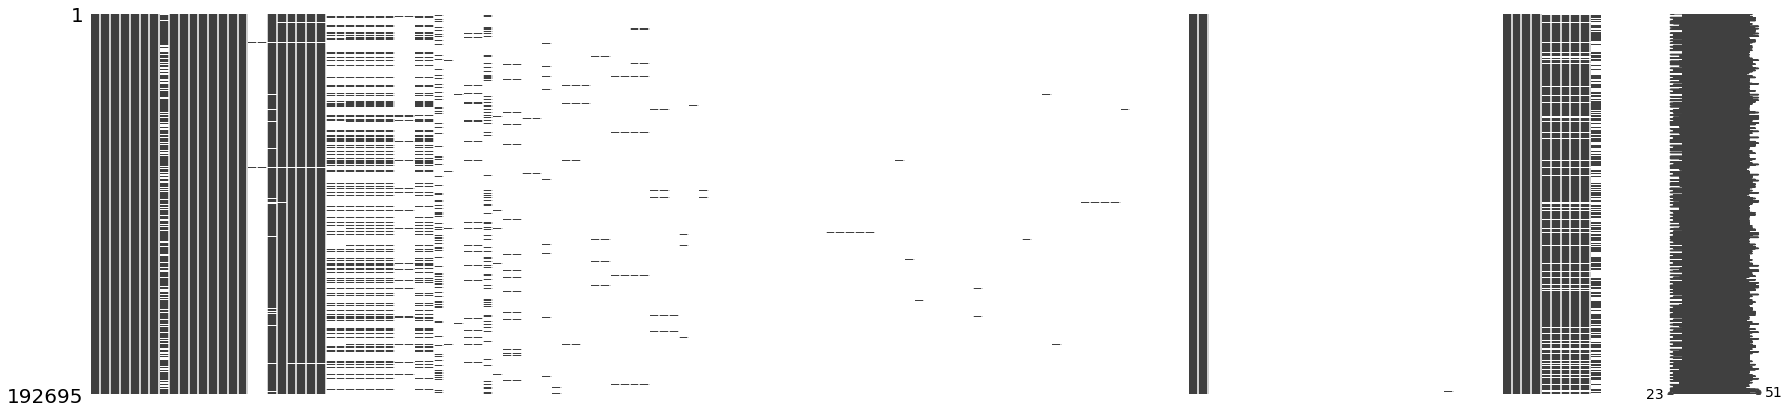

In [48]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_events_raw
msno.matrix(df_events_raw, figsize = (30, 7))

In [49]:
# Counts of missing values
null_value_stats = df_events_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

duration                             52722
tactics_formation                   192468
tactics_lineup                      192468
related_events                        7081
location                              1530
player_id                              847
player_name                            847
position_id                            847
position_name                          847
pass_recipient_id                   139973
pass_recipient_name                 139973
pass_length                         137875
pass_angle                          137875
pass_height_id                      137875
pass_height_name                    137875
pass_end_location                   137875
pass_type_id                        183883
pass_type_name                      183883
pass_body_part_id                   140741
pass_body_part_name                 140741
carry_end_location                  148893
pass_switch                         191073
out                                 191328
pass_outcom

We now have a single pandas DataFrame of all event data for the Men's EURO 2020. The next step is to engineer this data to a form suitable for analysis and visualisation.

___

<a id='section5'></a>

## <a id='#section5'>5. Data Engineering</a>
The next step is to wrangle the dataset to into a format that’s suitable for analysis, through the creation of bespoke in-possession and out-of-possession metrics.

This section is broken down into the following subsections:

4.1.    [Assign Raw DataFrame to Engineered DataFrame](#section4.1)<br>
4.2.    [Rename Columns](#section4.2)<br>
4.2.    [Drop Duplicate Columns](#section4.3)<br>
4.4.    [Sort the DataFrame](#section4.4)<br>
4.5.    [Determine Each Player's Most Frequent Position](#section4.5)<br>
4.6.    [Determine Each Player's Total Minutes Played](#section4.6)<br>
4.7.    [Break Down All location Attributes](#section4.7)<br>

<a id='section5.1'></a>

### <a id='#section5.1'>5.1. Assign Raw DataFrame to Engineered DataFrame</a>

In [ ]:
# Create copy of the raw DataFrame and assign it as a new, engineered DataFrame
df_events = df_events_raw.copy()

<a id='section5.2'></a>

### <a id='#section5.2'>5.2. Rename Columns</a>

In [ ]:
# Rename columns
df_events = df_events.rename(columns={'match_id_x': 'match_id',
                                      'season_id_x': 'season_id'
                                     }
                            )

<a id='section5.3'></a>

### <a id='#section5.3'>5.3. Drop Unessassary  Columns</a>

In [ ]:
# Drop duplicate columns
df_events = df_events.drop(['match_id_y', 'season_id_y'], axis=1)

<a id='section5.4'></a>

### <a id='#section5.4'>5.4. Sort DataFrame</a>
Sort DataFrame into correct order of events by time and date, required for creating accurate features.

In [ ]:
# Sort DataFrame
#df_events = df_events.sort_values(['match_id', 'period', 'timestamp'], ascending=[True, True, True])    # this is not correct logic when consider extra time i.e. first minute of extra time is 91st min, but can proceed last minutes of regular time in injury time
#df_events = df_events.sort_values(['match_id', 'index'], ascending=[True, True])

<a id='section5.5'></a>

### <a id='#section5.5'>5.5. Determine Each Player's Most Frequent Playing Position</a>
A player's dominant position is determined as the most frequent position in which the player is playing in the Events data i.e. the highest count of Events in that position. 

The following determined positions will be used as the player's primary position

In [ ]:
# Determine Each Player's Most Frequent Playing Position

## Groupby and Aggregate by player name and position
df_player_positions = (df_events
                           .groupby(['player_name', 'player_id', 'team_name', 'position_name'])
                           .agg({'type_name': 'count'})
                           .reset_index()
                      )

## Rename columns after groupby and aggregation
df_player_positions.columns = ['player_name', 'player_id', 'team_name', 'primary_position_name', 'count']

## Drop level
#df_player_positions.columns = df_player_positions.columns.droplevel(level=0)

## Reset index
df_player_positions = df_player_positions.reset_index()

## Sort by 'count of events' decending
df_player_positions = df_player_positions.sort_values(['player_name', 'count'], ascending=[True, False])

## Groupby position and drop the counts
df_player_positions = (df_player_positions
                           .groupby(['player_name', 'team_name']).head(1)
                           .drop(['index', 'count'], axis=1)
                      )

## Display DataFrame
df_player_positions.head(5)

Aggregate the positions into Goalkeepers, Defenders, Midfielders, and Forwards.

In [ ]:
# Show all unique values for position
df_events['position_name'].unique()

In [ ]:
# Map a defined dictionary of grouped positions, per specific position

## Define a dictionary of positions
dict_positions_grouped = {'Goalkeeper': 'Goalkeeper',
                          'Left Center Back': 'Defender',
                          'Center Back': 'Defender',
                          'Right Center Back': 'Defender',
                          'Left Back': 'Defender',
                          'Right Back': 'Defender',
                          'Left Wing Back': 'Defender',
                          'Right Wing Back': 'Defender',
                          'Left Defensive Midfield': 'Midfield',
                          'Center Defensive Midfield': 'Midfield',
                          'Right Defensive Midfield': 'Midfield',
                          'Left Center Midfield': 'Midfield',
                          'Center Midfield': 'Midfield',
                          'Right Center Midfield': 'Midfield',
                          'Left Midfield': 'Midfield',
                          'Right Midfield': 'Midfield',
                          'Left Attacking Midfield': 'Midfield',
                          'Right Attacking Midfield': 'Midfield',
                          'Center Attacking Midfield': 'Midfield',
                          'Left Center Forward': 'Forward',
                          'Center Forward': 'Forward',
                          'Right Center Forward': 'Forward',
                          'Left Wing': 'Forward',
                          'Right Wing': 'Forward',
                          'Secondary Striker': 'Forward'
                         }

## Map grouped positions to DataFrame
df_player_positions['primary_position_name_grouped'] = df_player_positions['primary_position_name'].map(dict_positions_grouped)

In [ ]:
# Show all unique values for position
df_player_positions['primary_position_name_grouped'].unique()

Finally, create an `outfield_goalkeeper` attribute.

In [ ]:
# Separate Goalkeepers and Outfielders
df_player_positions['outfielder_goalkeeper'] = np.where(df_player_positions['primary_position_name'].isnull(), np.nan, (np.where(df_player_positions['primary_position_name'] == 'Goalkeeper', 'Goalkeeper', 'Outfielder')))

In [ ]:
# Join onto the Events DataFrame
#df_events = pd.merge(df_events, df_player_positions, left_on=['player_name'], right_on=['player_name'], how='left')

<a id='section5.6'></a>

### <a id='#section5.6'>5.6. Determine Each Player's Total Minutes</a>

In [ ]:
# Determine Each Player's Total Minutes Played

## Groupby and Aggregate by player name and position
df_player_minutes = (df_events
                         .groupby(['player_name', 'match_id'])
                         .agg({'minute': ['min', 'max']})
                    )

## Drop level
df_player_minutes.columns = df_player_minutes.columns.droplevel(level=0)

## Reset index
df_player_minutes = df_player_minutes.reset_index()


## Reset 'min_start'
df_player_minutes['min'] = np.where(df_player_minutes['min'] <= 5, 0, df_player_minutes['min']) 

## Determine the total minutes played per match
df_player_minutes['mins_total'] = df_player_minutes['max'] - df_player_minutes['min'] 

## Sum the total minutes played
df_player_minutes = (df_player_minutes
                            .groupby(['player_name'])
                            .agg({'mins_total': ['sum']})
                       )

## Reset index
df_player_minutes = df_player_minutes.reset_index()

## Rename columns after groupby and aggregation
df_player_minutes.columns = ['player_name', 'mins_total']

## Sort by 'mins_total' decending
df_player_minutes = df_player_minutes.sort_values(['mins_total'], ascending=[False])

## Display DataFrame
df_player_minutes.head(5)

In [ ]:
# Join onto the Events DataFrame
df_events = pd.merge(df_events, df_player_minutes, left_on=['player_name'], right_on=['player_name'], how='left')

<a id='section5.7'></a>

### <a id='#section5.7'>5.7. Break Down All `location` Attributes</a>
Separate all location attributes for X, Y (and sometimes Z) coordinates

In [ ]:
# Display all location columns
for col in df_events.columns:
    if 'location' in col:
        print(col)

There are the following five 'location' attributes:
- `location`
- `pass.end_location`
- `carry.end_location`
- `shot.end_location`
- `goalkeeper.end_location`

From reviewing the official documentation [[link](https://statsbomb.com/stat-definitions/)], the five attributes have the following dimensionality:
- `location` [x, y]
- `pass.end_location` [x, y]
- `carry.end_location` [x, y]
- `shot.end_location` [x, y, z]
- `goalkeeper.end_location` [x, y]

In [ ]:
# Break Down All location Attributes - slightly clunky code, but works, so not replaced with a loop or regex yet

df_events['location'] = df_events['location'].astype(str)
df_events['pass_end_location'] = df_events['pass_end_location'].astype(str)
df_events['carry_end_location'] = df_events['carry_end_location'].astype(str)
df_events['shot_end_location'] = df_events['shot_end_location'].astype(str)
df_events['goalkeeper_end_location'] = df_events['goalkeeper_end_location'].astype(str)


df_events['location'] = df_events['location'].str.replace('[','')
df_events['pass_end_location'] = df_events['pass_end_location'].str.replace('[','')
df_events['carry_end_location'] = df_events['carry_end_location'].str.replace('[','')
df_events['shot_end_location'] = df_events['shot_end_location'].str.replace('[','')
df_events['goalkeeper_end_location'] = df_events['goalkeeper_end_location'].str.replace('[','')


df_events['location'] = df_events['location'].str.replace(']','')
df_events['pass_end_location'] = df_events['pass_end_location'].str.replace(']','')
df_events['carry_end_location'] = df_events['carry_end_location'].str.replace(']','')
df_events['shot_end_location'] = df_events['shot_end_location'].str.replace(']','')
df_events['goalkeeper_end_location'] = df_events['goalkeeper_end_location'].str.replace(']','')


df_events['location_x'], df_events['location_y'] = df_events['location'].str.split(',', 1).str
df_events['pass_end_location_x'], df_events['pass_end_location_y'] = df_events['pass_end_location'].str.split(',', 1).str
df_events['carry_end_location_x'], df_events['carry_end_location_y'] = df_events['carry_end_location'].str.split(',', 1).str
df_events['shot_end_location_x'], df_events['shot_end_location_y'], df_events['shot_end_location_z'] = df_events['shot_end_location'].str.split(',', 3).str[0:3].str
df_events['goalkeeper_end_location_x'], df_events['goalkeeper_end_location_y'] = df_events['goalkeeper_end_location'].str.split(',', 1).str


df_events['location_x'] = df_events['location_x'].astype(float)
df_events['location_y'] = df_events['location_y'].astype(float)
df_events['pass_end_location_x'] = df_events['pass_end_location_x'].astype(float)
df_events['pass_end_location_y'] = df_events['pass_end_location_y'].astype(float)
df_events['carry_end_location_x'] = df_events['carry_end_location_x'].astype(float)
df_events['carry_end_location_y'] = df_events['carry_end_location_y'].astype(float)
df_events['shot_end_location_x'] = df_events['shot_end_location_x'].astype(float)
df_events['shot_end_location_y'] = df_events['shot_end_location_y'].astype(float)
df_events['goalkeeper_end_location_x'] = df_events['goalkeeper_end_location_x'].astype(float)
df_events['goalkeeper_end_location_y'] = df_events['goalkeeper_end_location_y'].astype(float)

## Display DataFrame
df_events.head(5)

<a id='section5.8'></a>

### <a id='#section5.8'>5.8. Create New Attributes</a>

Baseline attributes required for determining in-possession and out-of-possession metrics in later section:
*    **Team**: the team or in this case, the country that the player is playing for;
*    **Opponent**: the team or in this case, the country that the player is playing against;
*    **Minutes played**: the number of minutes played; and
*    **Games played**: the total number of matches played (for the aggregated version only).

In [ ]:
# Create New Attributes
df_events['next_event'] = df_events['type_name'].shift(-1)
df_events['previous_event'] = df_events['type_name'].shift(+1)
df_events['next_team_possession'] = df_events['possession_team_name'].shift(-1)
df_events['previous_team_possession'] = df_events['possession_team_name'].shift(+1)
df_events['possession_retained'] = np.where((df_events['possession_team_name'] == df_events['next_team_possession']), 1, 0)
df_events['endloc_x'] = np.where(df_events['type_name'] == 'Pass', df_events['pass_end_location_x'], np.where(df_events['type_name'] == 'Carry', df_events['carry_end_location_x'], df_events['location_x']))
df_events['endloc_y'] = np.where(df_events['type_name'] == 'Pass', df_events['pass_end_location_y'], np.where(df_events['type_name'] == 'Carry', df_events['carry_end_location_y'], df_events['location_y']))
df_events['dist1'] = np.sqrt((df_events['location_x'] - 120)**2 + (df_events['location_y'] - 40)**2)
df_events['dist2'] = np.sqrt((df_events['endloc_x'] - 120)**2 + (df_events['endloc_y'] - 40)**2)
df_events['diffdist'] = df_events['dist1'] - df_events['dist2']

# Display DataFrame
df_events.head()

___

<a id='section6'></a>

## <a id='#section6'>6. Data Analysis</a>

The following data retrieval visualisation functions in the [`football_utils_statsbomb_data_viz.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_viz.py) football utils script.

This StatsBomb Data Visualisation ([`football_utils_statsbomb_data_viz.py`](https://github.com/mathematical-modelling-of-football/blob/main/scripts/football_utils_statsbomb_data_viz.py)) script contains the following functions:
1.    ...TBA
2.    ...TBA
3.    ...TBA

#### The exercise
1.    Think of a player who you enjoyed watching at the recent Men's Euros 2020 or Women's Euros 2022.
2.    What actions did they perform that were important and why?
3.    Plot the actions and describe how the data supports or contradicts your own analysis.
4.    Collect some statistics on that player for the tournament and put them in context. 
5.    Write a short text using at most two figures that illustrate your point.

## OLD CODE FROM THIS POINT

<a id='section6.1'></a>

### <a id='#section6.1'>6.1. Passing Networks</a>

In [ ]:
# Define function for creating a passing network from event data for all the teams in a season in a league of 20
def create_pass_network_league_20_teams(df_events=df_events,
                                        league_name='Premier League',
                                        season_name='2021/22',
                                        project_name=project_name,
                                        min_total_pass_count=0,
                                        min_pair_pass_count=5,
                                        min_xt=-3,
                                        max_xt=3,
                                        min_gda=-0.25,        
                                        max_gda=0.25,
                                        line_alpha=0.8,
                                        max_line_width=0.001,
                                        max_node_size=0.2,
                                        max_star_node_size=0.4,
                                        pitch_length_x=120,
                                        pitch_length_y=80,
                                        orientation='vertical',    # 'horizontal'
                                        aspect='fll',              #'fll'
                                        x_size=2400,
                                        y_size=2250,
                                        my_dpi=300,
                                        logo_afc=True,
                                        logo_statsbomb=True,
                                        logo_edd_webster=True,
                                        save_fig=True,
                                        team_1_name='Arsenal',
                                        team_2_name='Aston Villa',
                                        team_3_name='Brentford',
                                        team_4_name='Brighton',
                                        team_5_name='Burnley',
                                        team_6_name='Chelsea',
                                        team_7_name='Crystal Palace',
                                        team_8_name='Everton',
                                        team_9_name='Leeds',
                                        team_10_name='Leicester',
                                        team_11_name='Liverpool',
                                        team_12_name='Man City',
                                        team_13_name='Man United',
                                        team_14_name='Newcastle',
                                        team_15_name='Norwich',
                                        team_16_name='Southampton',
                                        team_17_name='Tottenham',
                                        team_18_name='Watford',
                                        team_19_name='West Ham',
                                        team_20_name='Wolves',
                                        team_1_formation='4-2-3-1',
                                        team_2_formation='4-3-3',
                                        team_3_formation='3-5-2',
                                        team_4_formation='3-5-2',
                                        team_5_formation='4-4-2',
                                        team_6_formation='3-4-2-1',
                                        team_7_formation='4-3-3',
                                        team_8_formation='4-4-2',
                                        team_9_formation='4-2-3-1',
                                        team_10_formation='4-2-3-1',
                                        team_11_formation='4-3-3',
                                        team_12_formation='4-3-3',
                                        team_13_formation='4-2-3-1',
                                        team_14_formation='4-3-3',
                                        team_15_formation='4-2-3-1',
                                        team_16_formation='4-4-2',
                                        team_17_formation='3-4-3',
                                        team_18_formation='4-3-3',
                                        team_19_formation='4-2-3-1',
                                        team_20_formation='3-4-3',
                                        team_1_colour='#EF0107',     # Arsenal
                                        team_2_colour='#95BFE5',     # Aston Villa
                                        team_3_colour='#C12026',     # Brentford
                                        team_4_colour='#0057B8',     # Brighton
                                        team_5_colour='#6C1D45',     # Burnley
                                        team_6_colour='#034694',     # Chelsea
                                        team_7_colour='#1B458F',     # Crystal Palace
                                        team_8_colour='#003399',     # Everton
                                        team_9_colour='#FFCD00',     # Leeds
                                        team_10_colour='#003090',    # Leicester
                                        team_11_colour='#C8102E',    # Liverpool
                                        team_12_colour='#6CABDD',    # Man City
                                        team_13_colour='#DA291C',    # Man United
                                        team_14_colour='#241F20',    # Newcastle
                                        team_15_colour='#FFF200',    # Norwich
                                        team_16_colour='#D71920',    # Southampton
                                        team_17_colour='#132257',    # Tottenham
                                        team_18_colour='#FBEE23',    # Watford
                                        team_19_colour='#7A263A',    # West Ham
                                        team_20_colour='#FDB913'     # Wolves
                                       ):

    """
    Function to create a passing network from event data for all the teams in a season in a league of 20, 
    utilising the 'draw_pitch' function created by Peter McKeever @petermckeever.
    """

    
    ## Data Engineering
    
    ### Call 'get_events_of_interest_df' function to Event dataset to filter for just events done by those done in the season(s) of interest by First XI players in their preferred formation and position
    df_events_first_xi = get_events_of_interest_df(df_events=df_events, lst_season_ids=lst_season_ids)

    
    ### Call 'get_passes_df' function to Event DataFrame to isolate only the passe in the Event data
    df_passes = get_passes_df(df_events=df_events_first_xi)

    
    ### Call 'get_players_df_mbm' function to passes DataFrames to determine the players
    df_players_mbm = get_players_df_mbm(df_passes=df_passes)

    
    ### Call 'get_player_ids' function to passes dataset
    df_player_ids, df_passer_ids, df_receiver_ids = get_player_ids(df_passes=df_passes)
    
    
    ### Call 'get_passes_between_df' function to passes and players DataFrames to determine the passes between players and the average location and counts
    df_passes_between, df_average_locs_and_count = get_passes_between_df(df_passes,
                                                                         df_players_mbm,
                                                                         pass_accurate=True,
                                                                         min_total_pass_count=min_total_pass_count,
                                                                         min_pair_pass_count=min_pair_pass_count,
                                                                        )

    
    """
    ### Determine the min and max xT per player, per season

    #### Group by Player ID and sum XT
    df_min_max_xt = (df_passes
                         .groupby(['season_id',
                                   'season',
                                   'player_id',
                                   'player_name'
                                  ])
                         .agg({'xT': ['sum'],
                               'gda': ['sum']})
                    )

    #### Drop level
    df_min_max_xt.columns = df_min_max_xt.columns.droplevel(level=0)

    #### Reset index
    df_min_max_xt = df_min_max_xt.reset_index()

    #### Rename columns
    df_min_max_xt.columns = ['season_id',
                             'season',
                             'player_id',
                             'player_name',
                             'xT_total'
                            ]

    #### Determine min and max xT
    min_xt = min(df_min_max_xt['xT_total'])
    max_xt = max(df_min_max_xt['xT_total'])
    
    #### Determine min and max GDA
    min_gda = min(df_min_max_xt['gda_total'])
    max_gda = max(df_min_max_xt['gda_total'])
    """
    
    ### Determine the number of teams in the dataset
    n = df_average_locs_and_count['team_name'].nunique()
    
    ### Manually assign teams
    team_1_name = team_1_name
    team_2_name = team_2_name
    team_3_name = team_3_name
    team_4_name = team_4_name
    team_5_name = team_5_name
    team_6_name = team_6_name
    team_7_name = team_7_name
    team_8_name = team_8_name
    team_9_name = team_9_name
    team_10_name = team_10_name
    team_11_name = team_11_name
    team_12_name = team_12_name
    team_13_name = team_13_name
    team_14_name = team_14_name
    team_15_name = team_15_name
    team_16_name = team_16_name
    team_17_name = team_17_name
    team_18_name = team_18_name
    team_19_name = team_19_name
    team_20_name = team_20_name
    
    """
    ### Determine the unique teams in the dataset
    lst_teams = list(df_average_locs_and_count['team_name'].unique())
    lst_teams.sort()

    
    ### Assign teams - find a neater solution to this
    team_1_name = lst_teams[n-n]
    team_2_name = lst_teams[n-18-1]
    team_3_name = lst_teams[n-17-1]
    team_4_name = lst_teams[n-16-1]
    team_5_name = lst_teams[n-15-1]
    team_6_name = lst_teams[n-14-1]
    team_7_name = lst_teams[n-13-1]
    team_8_name = lst_teams[n-12-1]
    team_9_name = lst_teams[n-11-1]
    team_10_name = lst_teams[n-10-1]
    team_11_name = lst_teams[n-9-1]
    team_12_name = lst_teams[n-8-1]
    team_13_name = lst_teams[n-7-1]
    team_14_name = lst_teams[n-6-1]
    team_15_name = lst_teams[n-5-1]
    team_16_name = lst_teams[n-4-1]
    team_17_name = lst_teams[n-3-1]
    team_18_name = lst_teams[n-2-1]
    team_19_name = lst_teams[n-1]
    team_20_name = lst_teams[n-n]
    """

    ### Convert pitch coordinates (statsbomb data is 100 by 100, convert to 120 by 80)
    
    #### Average Locations and Count DataFrame
    df_average_locs_and_count['location_x'] = df_average_locs_and_count['location_x'] * pitch_length_x/100
    df_average_locs_and_count['location_y'] = df_average_locs_and_count['location_y'] * pitch_length_y/100
    
    #### Passes Between DataFrame
    df_passes_between['location_x'] = df_passes_between['location_x'] * pitch_length_x/100
    df_passes_between['location_y'] = df_passes_between['location_y'] * pitch_length_y/100
    df_passes_between['location_x_end'] = df_passes_between['location_x_end'] * pitch_length_x/100
    df_passes_between['location_y_end'] = df_passes_between['location_y_end'] * pitch_length_y/100
    

    ### Create individual Average Location and Count DataFrames for each team
    
    #### Average Locations and Count DataFrames - nodes
    df_average_locs_and_count_team_1 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_1_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_2 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_2_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_3 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_3_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_4 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_4_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_5 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_5_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_6 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_6_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_7 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_7_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_8 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_8_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_9 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_9_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_10 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_10_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_11 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_11_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_12 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_12_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_13 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_13_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_14 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_14_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_15 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_15_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_16 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_16_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_17 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_17_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_18 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_18_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_19 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_19_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    df_average_locs_and_count_team_20 = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_20_name) & (df_average_locs_and_count['isLonelySix'] == False)]
    
    #### Average Locations and Count DataFrames for Lonely Sixes - star nodes
    df_average_locs_and_count_team_1_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_1_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_2_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_2_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_3_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_3_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_4_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_4_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_5_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_5_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_6_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_6_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_7_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_7_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_8_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_8_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_9_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_9_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_10_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_10_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_11_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_11_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_12_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_12_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_13_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_13_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_14_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_14_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_15_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_15_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_16_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_16_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_17_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_17_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_18_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_18_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_19_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_19_name) & (df_average_locs_and_count['isLonelySix'] == True)]
    df_average_locs_and_count_team_20_lonely_six = df_average_locs_and_count[(df_average_locs_and_count['team_name'] == team_20_name) & (df_average_locs_and_count['isLonelySix'] == True)]

    #### Passes Between DataFrames
    df_passes_between_team_1 = df_passes_between[(df_passes_between['team_name'] == team_1_name)]
    df_passes_between_team_2 = df_passes_between[(df_passes_between['team_name'] == team_2_name)]
    df_passes_between_team_3 = df_passes_between[(df_passes_between['team_name'] == team_3_name)]
    df_passes_between_team_4 = df_passes_between[(df_passes_between['team_name'] == team_4_name)]
    df_passes_between_team_5 = df_passes_between[(df_passes_between['team_name'] == team_5_name)]
    df_passes_between_team_6 = df_passes_between[(df_passes_between['team_name'] == team_6_name)]
    df_passes_between_team_7 = df_passes_between[(df_passes_between['team_name'] == team_7_name)]
    df_passes_between_team_8 = df_passes_between[(df_passes_between['team_name'] == team_8_name)]
    df_passes_between_team_9 = df_passes_between[(df_passes_between['team_name'] == team_9_name)]
    df_passes_between_team_10 = df_passes_between[(df_passes_between['team_name'] == team_10_name)]
    df_passes_between_team_11 = df_passes_between[(df_passes_between['team_name'] == team_11_name)]
    df_passes_between_team_12 = df_passes_between[(df_passes_between['team_name'] == team_12_name)]
    df_passes_between_team_13 = df_passes_between[(df_passes_between['team_name'] == team_13_name)]
    df_passes_between_team_14 = df_passes_between[(df_passes_between['team_name'] == team_14_name)]
    df_passes_between_team_15 = df_passes_between[(df_passes_between['team_name'] == team_15_name)]
    df_passes_between_team_16 = df_passes_between[(df_passes_between['team_name'] == team_16_name)]
    df_passes_between_team_17 = df_passes_between[(df_passes_between['team_name'] == team_17_name)]
    df_passes_between_team_18 = df_passes_between[(df_passes_between['team_name'] == team_18_name)]
    df_passes_between_team_19 = df_passes_between[(df_passes_between['team_name'] == team_19_name)]
    df_passes_between_team_20 = df_passes_between[(df_passes_between['team_name'] == team_20_name)]
    
    
    ### Create lists of X and Y coordinates from each of the Average Location and Count DataFrames
    lst_x_team_1 = df_average_locs_and_count_team_1['location_x'].tolist()
    lst_y_team_1 = df_average_locs_and_count_team_1['location_y'].tolist()
    lst_x_team_2 = df_average_locs_and_count_team_2['location_x'].tolist()
    lst_y_team_2 = df_average_locs_and_count_team_2['location_y'].tolist()
    lst_x_team_3 = df_average_locs_and_count_team_3['location_x'].tolist()
    lst_y_team_3 = df_average_locs_and_count_team_3['location_y'].tolist()
    lst_x_team_4 = df_average_locs_and_count_team_4['location_x'].tolist()
    lst_y_team_4 = df_average_locs_and_count_team_4['location_y'].tolist()
    lst_x_team_5 = df_average_locs_and_count_team_5['location_x'].tolist()
    lst_y_team_5 = df_average_locs_and_count_team_5['location_y'].tolist()
    lst_x_team_6 = df_average_locs_and_count_team_6['location_x'].tolist()
    lst_y_team_6 = df_average_locs_and_count_team_6['location_y'].tolist()
    lst_x_team_7 = df_average_locs_and_count_team_7['location_x'].tolist()
    lst_y_team_7 = df_average_locs_and_count_team_7['location_y'].tolist()
    lst_x_team_8 = df_average_locs_and_count_team_8['location_x'].tolist()
    lst_y_team_8 = df_average_locs_and_count_team_8['location_y'].tolist()
    lst_x_team_9 = df_average_locs_and_count_team_9['location_x'].tolist()
    lst_y_team_9 = df_average_locs_and_count_team_9['location_y'].tolist()
    lst_x_team_10 = df_average_locs_and_count_team_10['location_x'].tolist()
    lst_y_team_10 = df_average_locs_and_count_team_10['location_y'].tolist()
    lst_x_team_11 = df_average_locs_and_count_team_11['location_x'].tolist()
    lst_y_team_11 = df_average_locs_and_count_team_11['location_y'].tolist()
    lst_x_team_12 = df_average_locs_and_count_team_12['location_x'].tolist()
    lst_y_team_12 = df_average_locs_and_count_team_12['location_y'].tolist()
    lst_x_team_13 = df_average_locs_and_count_team_13['location_x'].tolist()
    lst_y_team_13 = df_average_locs_and_count_team_13['location_y'].tolist()
    lst_x_team_14 = df_average_locs_and_count_team_14['location_x'].tolist()
    lst_y_team_14 = df_average_locs_and_count_team_14['location_y'].tolist()
    lst_x_team_15 = df_average_locs_and_count_team_15['location_x'].tolist()
    lst_y_team_15 = df_average_locs_and_count_team_15['location_y'].tolist()
    lst_x_team_16 = df_average_locs_and_count_team_16['location_x'].tolist()
    lst_y_team_16 = df_average_locs_and_count_team_16['location_y'].tolist()
    lst_x_team_17 = df_average_locs_and_count_team_17['location_x'].tolist()
    lst_y_team_17 = df_average_locs_and_count_team_17['location_y'].tolist()
    lst_x_team_18 = df_average_locs_and_count_team_18['location_x'].tolist()
    lst_y_team_18 = df_average_locs_and_count_team_18['location_y'].tolist()
    lst_x_team_19 = df_average_locs_and_count_team_19['location_x'].tolist()
    lst_y_team_19 = df_average_locs_and_count_team_19['location_y'].tolist()
    lst_x_team_20 = df_average_locs_and_count_team_20['location_x'].tolist()
    lst_y_team_20 = df_average_locs_and_count_team_20['location_y'].tolist()
    
    ### Create lists of X and Y coordinates from each of the Average Location and Count DataFrames of the lonely sixes - star nodes
    lst_x_team_1_lonely_six = df_average_locs_and_count_team_1_lonely_six['location_x'].tolist()
    lst_y_team_1_lonely_six = df_average_locs_and_count_team_1_lonely_six['location_y'].tolist()
    lst_x_team_2_lonely_six = df_average_locs_and_count_team_2_lonely_six['location_x'].tolist()
    lst_y_team_2_lonely_six = df_average_locs_and_count_team_2_lonely_six['location_y'].tolist()
    lst_x_team_3_lonely_six = df_average_locs_and_count_team_3_lonely_six['location_x'].tolist()
    lst_y_team_3_lonely_six = df_average_locs_and_count_team_3_lonely_six['location_y'].tolist()
    lst_x_team_4_lonely_six = df_average_locs_and_count_team_4_lonely_six['location_x'].tolist()
    lst_y_team_4_lonely_six = df_average_locs_and_count_team_4_lonely_six['location_y'].tolist()
    lst_x_team_5_lonely_six = df_average_locs_and_count_team_5_lonely_six['location_x'].tolist()
    lst_y_team_5_lonely_six = df_average_locs_and_count_team_5_lonely_six['location_y'].tolist()
    lst_x_team_6_lonely_six = df_average_locs_and_count_team_6_lonely_six['location_x'].tolist()
    lst_y_team_6_lonely_six = df_average_locs_and_count_team_6_lonely_six['location_y'].tolist()
    lst_x_team_7_lonely_six = df_average_locs_and_count_team_7_lonely_six['location_x'].tolist()
    lst_y_team_7_lonely_six = df_average_locs_and_count_team_7_lonely_six['location_y'].tolist()
    lst_x_team_8_lonely_six = df_average_locs_and_count_team_8_lonely_six['location_x'].tolist()
    lst_y_team_8_lonely_six = df_average_locs_and_count_team_8_lonely_six['location_y'].tolist()
    lst_x_team_9_lonely_six = df_average_locs_and_count_team_9_lonely_six['location_x'].tolist()
    lst_y_team_9_lonely_six = df_average_locs_and_count_team_9_lonely_six['location_y'].tolist()
    lst_x_team_10_lonely_six = df_average_locs_and_count_team_10_lonely_six['location_x'].tolist()
    lst_y_team_10_lonely_six = df_average_locs_and_count_team_10_lonely_six['location_y'].tolist()
    lst_x_team_11_lonely_six = df_average_locs_and_count_team_11_lonely_six['location_x'].tolist()
    lst_y_team_11_lonely_six = df_average_locs_and_count_team_11_lonely_six['location_y'].tolist()
    lst_x_team_12_lonely_six = df_average_locs_and_count_team_12_lonely_six['location_x'].tolist()
    lst_y_team_12_lonely_six = df_average_locs_and_count_team_12_lonely_six['location_y'].tolist()
    lst_x_team_13_lonely_six = df_average_locs_and_count_team_13_lonely_six['location_x'].tolist()
    lst_y_team_13_lonely_six = df_average_locs_and_count_team_13_lonely_six['location_y'].tolist()
    lst_x_team_14_lonely_six = df_average_locs_and_count_team_14_lonely_six['location_x'].tolist()
    lst_y_team_14_lonely_six = df_average_locs_and_count_team_14_lonely_six['location_y'].tolist()
    lst_x_team_15_lonely_six = df_average_locs_and_count_team_15_lonely_six['location_x'].tolist()
    lst_y_team_15_lonely_six = df_average_locs_and_count_team_15_lonely_six['location_y'].tolist()
    lst_x_team_16_lonely_six = df_average_locs_and_count_team_16_lonely_six['location_x'].tolist()
    lst_y_team_16_lonely_six = df_average_locs_and_count_team_16_lonely_six['location_y'].tolist()
    lst_x_team_17_lonely_six = df_average_locs_and_count_team_17_lonely_six['location_x'].tolist()
    lst_y_team_17_lonely_six = df_average_locs_and_count_team_17_lonely_six['location_y'].tolist()
    lst_x_team_18_lonely_six = df_average_locs_and_count_team_18_lonely_six['location_x'].tolist()
    lst_y_team_18_lonely_six = df_average_locs_and_count_team_18_lonely_six['location_y'].tolist()
    lst_x_team_19_lonely_six = df_average_locs_and_count_team_19_lonely_six['location_x'].tolist()
    lst_y_team_19_lonely_six = df_average_locs_and_count_team_19_lonely_six['location_y'].tolist()
    lst_x_team_20_lonely_six = df_average_locs_and_count_team_20_lonely_six['location_x'].tolist()
    lst_y_team_20_lonely_six = df_average_locs_and_count_team_20_lonely_six['location_y'].tolist()

    
    ### Create lists of xT values from each of the Average Location and Count DataFrames
    
    #### Normal players 
    lst_xt_team_1 = df_average_locs_and_count_team_1['xT_p90'].tolist()
    lst_xt_team_2 = df_average_locs_and_count_team_2['xT_p90'].tolist()
    lst_xt_team_3 = df_average_locs_and_count_team_3['xT_p90'].tolist()
    lst_xt_team_4 = df_average_locs_and_count_team_4['xT_p90'].tolist()
    lst_xt_team_5 = df_average_locs_and_count_team_5['xT_p90'].tolist()
    lst_xt_team_6 = df_average_locs_and_count_team_6['xT_p90'].tolist()
    lst_xt_team_7 = df_average_locs_and_count_team_7['xT_p90'].tolist()
    lst_xt_team_8 = df_average_locs_and_count_team_8['xT_p90'].tolist()
    lst_xt_team_9 = df_average_locs_and_count_team_9['xT_p90'].tolist()
    lst_xt_team_10 = df_average_locs_and_count_team_10['xT_p90'].tolist()
    lst_xt_team_11 = df_average_locs_and_count_team_11['xT_p90'].tolist()
    lst_xt_team_12 = df_average_locs_and_count_team_12['xT_p90'].tolist()
    lst_xt_team_13 = df_average_locs_and_count_team_13['xT_p90'].tolist()
    lst_xt_team_14 = df_average_locs_and_count_team_14['xT_p90'].tolist()
    lst_xt_team_15 = df_average_locs_and_count_team_15['xT_p90'].tolist()
    lst_xt_team_16 = df_average_locs_and_count_team_16['xT_p90'].tolist()
    lst_xt_team_17 = df_average_locs_and_count_team_17['xT_p90'].tolist()
    lst_xt_team_18 = df_average_locs_and_count_team_18['xT_p90'].tolist()
    lst_xt_team_19 = df_average_locs_and_count_team_19['xT_p90'].tolist()
    lst_xt_team_20 = df_average_locs_and_count_team_20['xT_p90'].tolist()
    
    #### Lonely sixes
    lst_xt_team_1_lonely_six = df_average_locs_and_count_team_1_lonely_six['xT_p90'].tolist()
    lst_xt_team_2_lonely_six = df_average_locs_and_count_team_2_lonely_six['xT_p90'].tolist()
    lst_xt_team_3_lonely_six = df_average_locs_and_count_team_3_lonely_six['xT_p90'].tolist()
    lst_xt_team_4_lonely_six = df_average_locs_and_count_team_4_lonely_six['xT_p90'].tolist()
    lst_xt_team_5_lonely_six = df_average_locs_and_count_team_5_lonely_six['xT_p90'].tolist()
    lst_xt_team_6_lonely_six = df_average_locs_and_count_team_6_lonely_six['xT_p90'].tolist()
    lst_xt_team_7_lonely_six = df_average_locs_and_count_team_7_lonely_six['xT_p90'].tolist()
    lst_xt_team_8_lonely_six = df_average_locs_and_count_team_8_lonely_six['xT_p90'].tolist()
    lst_xt_team_9_lonely_six = df_average_locs_and_count_team_9_lonely_six['xT_p90'].tolist()
    lst_xt_team_10_lonely_six = df_average_locs_and_count_team_10_lonely_six['xT_p90'].tolist()
    lst_xt_team_11_lonely_six = df_average_locs_and_count_team_11_lonely_six['xT_p90'].tolist()
    lst_xt_team_12_lonely_six = df_average_locs_and_count_team_12_lonely_six['xT_p90'].tolist()
    lst_xt_team_13_lonely_six = df_average_locs_and_count_team_13_lonely_six['xT_p90'].tolist()
    lst_xt_team_14_lonely_six = df_average_locs_and_count_team_14_lonely_six['xT_p90'].tolist()
    lst_xt_team_15_lonely_six = df_average_locs_and_count_team_15_lonely_six['xT_p90'].tolist()
    lst_xt_team_16_lonely_six = df_average_locs_and_count_team_16_lonely_six['xT_p90'].tolist()
    lst_xt_team_17_lonely_six = df_average_locs_and_count_team_17_lonely_six['xT_p90'].tolist()
    lst_xt_team_18_lonely_six = df_average_locs_and_count_team_18_lonely_six['xT_p90'].tolist()
    lst_xt_team_19_lonely_six = df_average_locs_and_count_team_19_lonely_six['xT_p90'].tolist()
    lst_xt_team_20_lonely_six = df_average_locs_and_count_team_20_lonely_six['xT_p90'].tolist()
    
    
    ### Create lists of GDA values from each of the Average Location and Count DataFrames
    
    #### Normal players 
    lst_gda_team_1 = df_average_locs_and_count_team_1['gda_p90'].tolist()
    lst_gda_team_2 = df_average_locs_and_count_team_2['gda_p90'].tolist()
    lst_gda_team_3 = df_average_locs_and_count_team_3['gda_p90'].tolist()
    lst_gda_team_4 = df_average_locs_and_count_team_4['gda_p90'].tolist()
    lst_gda_team_5 = df_average_locs_and_count_team_5['gda_p90'].tolist()
    lst_gda_team_6 = df_average_locs_and_count_team_6['gda_p90'].tolist()
    lst_gda_team_7 = df_average_locs_and_count_team_7['gda_p90'].tolist()
    lst_gda_team_8 = df_average_locs_and_count_team_8['gda_p90'].tolist()
    lst_gda_team_9 = df_average_locs_and_count_team_9['gda_p90'].tolist()
    lst_gda_team_10 = df_average_locs_and_count_team_10['gda_p90'].tolist()
    lst_gda_team_11 = df_average_locs_and_count_team_11['gda_p90'].tolist()
    lst_gda_team_12 = df_average_locs_and_count_team_12['gda_p90'].tolist()
    lst_gda_team_13 = df_average_locs_and_count_team_13['gda_p90'].tolist()
    lst_gda_team_14 = df_average_locs_and_count_team_14['gda_p90'].tolist()
    lst_gda_team_15 = df_average_locs_and_count_team_15['gda_p90'].tolist()
    lst_gda_team_16 = df_average_locs_and_count_team_16['gda_p90'].tolist()
    lst_gda_team_17 = df_average_locs_and_count_team_17['gda_p90'].tolist()
    lst_gda_team_18 = df_average_locs_and_count_team_18['gda_p90'].tolist()
    lst_gda_team_19 = df_average_locs_and_count_team_19['gda_p90'].tolist()
    lst_gda_team_20 = df_average_locs_and_count_team_20['gda_p90'].tolist()
    
    #### Lonely sixes
    lst_gda_team_1_lonely_six = df_average_locs_and_count_team_1_lonely_six['gda_p90'].tolist()
    lst_gda_team_2_lonely_six = df_average_locs_and_count_team_2_lonely_six['gda_p90'].tolist()
    lst_gda_team_3_lonely_six = df_average_locs_and_count_team_3_lonely_six['gda_p90'].tolist()
    lst_gda_team_4_lonely_six = df_average_locs_and_count_team_4_lonely_six['gda_p90'].tolist()
    lst_gda_team_5_lonely_six = df_average_locs_and_count_team_5_lonely_six['gda_p90'].tolist()
    lst_gda_team_6_lonely_six = df_average_locs_and_count_team_6_lonely_six['gda_p90'].tolist()
    lst_gda_team_7_lonely_six = df_average_locs_and_count_team_7_lonely_six['gda_p90'].tolist()
    lst_gda_team_8_lonely_six = df_average_locs_and_count_team_8_lonely_six['gda_p90'].tolist()
    lst_gda_team_9_lonely_six = df_average_locs_and_count_team_9_lonely_six['gda_p90'].tolist()
    lst_gda_team_10_lonely_six = df_average_locs_and_count_team_10_lonely_six['gda_p90'].tolist()
    lst_gda_team_11_lonely_six = df_average_locs_and_count_team_11_lonely_six['gda_p90'].tolist()
    lst_gda_team_12_lonely_six = df_average_locs_and_count_team_12_lonely_six['gda_p90'].tolist()
    lst_gda_team_13_lonely_six = df_average_locs_and_count_team_13_lonely_six['gda_p90'].tolist()
    lst_gda_team_14_lonely_six = df_average_locs_and_count_team_14_lonely_six['gda_p90'].tolist()
    lst_gda_team_15_lonely_six = df_average_locs_and_count_team_15_lonely_six['gda_p90'].tolist()
    lst_gda_team_16_lonely_six = df_average_locs_and_count_team_16_lonely_six['gda_p90'].tolist()
    lst_gda_team_17_lonely_six = df_average_locs_and_count_team_17_lonely_six['gda_p90'].tolist()
    lst_gda_team_18_lonely_six = df_average_locs_and_count_team_18_lonely_six['gda_p90'].tolist()
    lst_gda_team_19_lonely_six = df_average_locs_and_count_team_19_lonely_six['gda_p90'].tolist()
    lst_gda_team_20_lonely_six = df_average_locs_and_count_team_20_lonely_six['gda_p90'].tolist()
    
    
    ### Create lists of Passes Count values from each of the Average Location and Count DataFrames
    
    #### Define max_node_size to - results in a change in the size of the dots
    max_node_size=max_node_size
    
    #### Create lists
    
    ##### Normal players
    
    ###### Team 1
    lst_passes_count_team_1 = df_average_locs_and_count_team_1['count_p90'].tolist()
    lst_passes_count_team_1 = [max_node_size * i for i in lst_passes_count_team_1]
    
    ###### Team 2
    lst_passes_count_team_2 = df_average_locs_and_count_team_2['count_p90'].tolist()
    lst_passes_count_team_2 = [max_node_size * i for i in lst_passes_count_team_2]
    
    ###### Team 3
    lst_passes_count_team_3 = df_average_locs_and_count_team_3['count_p90'].tolist()
    lst_passes_count_team_3 = [max_node_size * i for i in lst_passes_count_team_3]
    
    ##### Team 4
    lst_passes_count_team_4 = df_average_locs_and_count_team_4['count_p90'].tolist()
    lst_passes_count_team_4 = [max_node_size * i for i in lst_passes_count_team_4]
    
    ##### Team 5
    lst_passes_count_team_5 = df_average_locs_and_count_team_5['count_p90'].tolist()
    lst_passes_count_team_5 = [max_node_size * i for i in lst_passes_count_team_5]
    
    ##### Team 6
    lst_passes_count_team_6 = df_average_locs_and_count_team_6['count_p90'].tolist()
    lst_passes_count_team_6 = [max_node_size * i for i in lst_passes_count_team_6]
    
    ##### Team 7
    lst_passes_count_team_7 = df_average_locs_and_count_team_7['count_p90'].tolist()
    lst_passes_count_team_7 = [max_node_size * i for i in lst_passes_count_team_7]
    
    ##### Team 8
    lst_passes_count_team_8 = df_average_locs_and_count_team_8['count_p90'].tolist()
    lst_passes_count_team_8 = [max_node_size * i for i in lst_passes_count_team_8]
    
    ##### Team 9
    lst_passes_count_team_9 = df_average_locs_and_count_team_9['count_p90'].tolist()
    lst_passes_count_team_9 = [max_node_size * i for i in lst_passes_count_team_9]
    
    ##### Team 10
    lst_passes_count_team_10 = df_average_locs_and_count_team_10['count_p90'].tolist()
    lst_passes_count_team_10 = [max_node_size * i for i in lst_passes_count_team_10]
    
    ##### Team 11
    lst_passes_count_team_11 = df_average_locs_and_count_team_11['count_p90'].tolist()
    lst_passes_count_team_11 = [max_node_size * i for i in lst_passes_count_team_11]
    
    ##### Team 12
    lst_passes_count_team_12 = df_average_locs_and_count_team_12['count_p90'].tolist()
    lst_passes_count_team_12 = [max_node_size * i for i in lst_passes_count_team_12]
    
    ##### Team 13
    lst_passes_count_team_13 = df_average_locs_and_count_team_13['count_p90'].tolist()
    lst_passes_count_team_13 = [max_node_size * i for i in lst_passes_count_team_13]
    
    ##### Team 14
    lst_passes_count_team_14 = df_average_locs_and_count_team_14['count_p90'].tolist()
    lst_passes_count_team_14 = [max_node_size * i for i in lst_passes_count_team_14]
    
    ##### Team 15
    lst_passes_count_team_15 = df_average_locs_and_count_team_15['count_p90'].tolist()
    lst_passes_count_team_15 = [max_node_size * i for i in lst_passes_count_team_15]
    
    ##### Team 16
    lst_passes_count_team_16 = df_average_locs_and_count_team_16['count_p90'].tolist()
    lst_passes_count_team_16 = [max_node_size * i for i in lst_passes_count_team_16]
    
    ##### Team 17
    lst_passes_count_team_17 = df_average_locs_and_count_team_17['count_p90'].tolist()
    lst_passes_count_team_17 = [max_node_size * i for i in lst_passes_count_team_17]
    
    ##### Team 18
    lst_passes_count_team_18 = df_average_locs_and_count_team_18['count_p90'].tolist()
    lst_passes_count_team_18 = [max_node_size * i for i in lst_passes_count_team_18]
    
    ##### Team 19
    lst_passes_count_team_19 = df_average_locs_and_count_team_19['count_p90'].tolist()
    lst_passes_count_team_19 = [max_node_size * i for i in lst_passes_count_team_19]
    
    ##### Team 20
    lst_passes_count_team_20 = df_average_locs_and_count_team_20['count_p90'].tolist()
    lst_passes_count_team_20 = [max_node_size * i for i in lst_passes_count_team_20]
    
    
    ##### Lonely Sixes
    
    ###### Team 1
    lst_passes_count_team_1_lonely_six = df_average_locs_and_count_team_1_lonely_six['count_p90'].tolist()
    lst_passes_count_team_1_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_1_lonely_six]
    
    ###### Team 2
    lst_passes_count_team_2_lonely_six = df_average_locs_and_count_team_2_lonely_six['count_p90'].tolist()
    lst_passes_count_team_2_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_2_lonely_six]
    
    ###### Team 3
    lst_passes_count_team_3_lonely_six = df_average_locs_and_count_team_3_lonely_six['count_p90'].tolist()
    lst_passes_count_team_3_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_3_lonely_six]
    
    ##### Team 4
    lst_passes_count_team_4_lonely_six = df_average_locs_and_count_team_4_lonely_six['count_p90'].tolist()
    lst_passes_count_team_4_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_4_lonely_six]
    
    ##### Team 5
    lst_passes_count_team_5_lonely_six = df_average_locs_and_count_team_5_lonely_six['count_p90'].tolist()
    lst_passes_count_team_5_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_5_lonely_six]
    
    ##### Team 6
    lst_passes_count_team_6_lonely_six = df_average_locs_and_count_team_6_lonely_six['count_p90'].tolist()
    lst_passes_count_team_6_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_6_lonely_six]
    
    ##### Team 7
    lst_passes_count_team_7_lonely_six = df_average_locs_and_count_team_7_lonely_six['count_p90'].tolist()
    lst_passes_count_team_7_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_7_lonely_six]
    
    ##### Team 8
    lst_passes_count_team_8_lonely_six = df_average_locs_and_count_team_8_lonely_six['count_p90'].tolist()
    lst_passes_count_team_8_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_8_lonely_six]
    
    ##### Team 9
    lst_passes_count_team_9_lonely_six = df_average_locs_and_count_team_9_lonely_six['count_p90'].tolist()
    lst_passes_count_team_9_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_9_lonely_six]
    
    ##### Team 10
    lst_passes_count_team_10_lonely_six = df_average_locs_and_count_team_10_lonely_six['count_p90'].tolist()
    lst_passes_count_team_10_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_10_lonely_six]
    
    ##### Team 11
    lst_passes_count_team_11_lonely_six = df_average_locs_and_count_team_11_lonely_six['count_p90'].tolist()
    lst_passes_count_team_11_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_11_lonely_six]
    
    ##### Team 12
    lst_passes_count_team_12_lonely_six = df_average_locs_and_count_team_12_lonely_six['count_p90'].tolist()
    lst_passes_count_team_12_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_12_lonely_six]
    
    ##### Team 13
    lst_passes_count_team_13_lonely_six = df_average_locs_and_count_team_13_lonely_six['count_p90'].tolist()
    lst_passes_count_team_13_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_13_lonely_six]
    
    ##### Team 14
    lst_passes_count_team_14_lonely_six = df_average_locs_and_count_team_14_lonely_six['count_p90'].tolist()
    lst_passes_count_team_14_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_14_lonely_six]
    
    ##### Team 15
    lst_passes_count_team_15_lonely_six = df_average_locs_and_count_team_15_lonely_six['count_p90'].tolist()
    lst_passes_count_team_15_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_15_lonely_six]
    
    ##### Team 16
    lst_passes_count_team_16_lonely_six = df_average_locs_and_count_team_16_lonely_six['count_p90'].tolist()
    lst_passes_count_team_16_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_16_lonely_six]
    
    ##### Team 17
    lst_passes_count_team_17_lonely_six = df_average_locs_and_count_team_17_lonely_six['count_p90'].tolist()
    lst_passes_count_team_17_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_17_lonely_six]
    
    ##### Team 18
    lst_passes_count_team_18_lonely_six = df_average_locs_and_count_team_18_lonely_six['count_p90'].tolist()
    lst_passes_count_team_18_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_18_lonely_six]
    
    ##### Team 19
    lst_passes_count_team_19_lonely_six = df_average_locs_and_count_team_19_lonely_six['count_p90'].tolist()
    lst_passes_count_team_19_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_19_lonely_six]
    
    ##### Team 20
    lst_passes_count_team_20_lonely_six = df_average_locs_and_count_team_20_lonely_six['count_p90'].tolist()
    lst_passes_count_team_20_lonely_six  = [max_star_node_size * i for i in lst_passes_count_team_20_lonely_six]
    
    
    
    
    
    ## Data Visualisation


    ### Define colours
    mpl.rcParams.update(mpl.rcParamsDefault)
    background='#121212'       #'#0e1821'
    title_colour='#f5f5f5'     #'black'
    text_colour='#f5f5f5'      #'black'
    line_colour='#808080'      #'#f5f5f5'      #'#3B3B3B'
    mpl.rcParams['xtick.color'] = text_colour
    mpl.rcParams['ytick.color'] = text_colour
    mpl.rcParams.update({'font.size': 18})
   #cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#d45a7f', '#ebe09c', '#019496'])
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#bc2d91', '#ebe09c', '#32a2a2'])

    
    ### Define font
    
    #### Define filepath
    font_files = font_manager.findSystemFonts(fontpaths=fonts_dir)

    #### Select font
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    #### Set font
    plt.rcParams['font.family']='Montserrat'
    plt.rcParams['font.sans-serif']='Montserrat'
    title_font='Montserrat'    #'Calibri'
    main_font='Montserrat'     #'Calibri'
    
    #### Font sizes
    title_font_size=16
    subtitle_font_size=13
    team_label_font_size=9
    footnote_font_size=8

    
    ### Set Gridlines 
    #ax.grid(lw=0.25, color='k', zorder=1)


    ### Create figure - 5 by 4 plot
   #fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20)) = plt.subplots(5, 4, figsize=(x_size/my_dpi, y_size/my_dpi), dpi=my_dpi)
    fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(4, 5, figsize=(x_size/my_dpi, y_size/my_dpi), dpi=my_dpi)
    fig.set_facecolor(background)
    ax1.patch.set_facecolor(background)
    ax2.patch.set_facecolor(background)
    ax3.patch.set_facecolor(background)
    ax4.patch.set_facecolor(background)
    ax5.patch.set_facecolor(background)
    ax6.patch.set_facecolor(background)
    ax7.patch.set_facecolor(background)
    ax8.patch.set_facecolor(background)
    ax9.patch.set_facecolor(background)
    ax10.patch.set_facecolor(background)
    ax11.patch.set_facecolor(background)
    ax12.patch.set_facecolor(background)
    ax13.patch.set_facecolor(background)
    ax14.patch.set_facecolor(background)
    ax15.patch.set_facecolor(background)
    ax16.patch.set_facecolor(background)
    ax17.patch.set_facecolor(background)
    ax18.patch.set_facecolor(background)
    ax19.patch.set_facecolor(background)
    ax20.patch.set_facecolor(background)

    
    
    """    
    ### Add small legend in the bottom center - not using for this visualisation
    
    #### 
    mSize = [1.05, 0.10, 0.2, 0.4, 0.6, 1]
    mSizeS = [1000 * i for i in mSize]
    mx = [0.05, 3.0, 5.0, 7.5, 10.625, 14.25]
    my = [1.05, 115, 115, 115, 115, 115]
    ax3.text(0.5,
             10,
             'xT',
             color='#f5f5f5', #'black'
             ha='center',
             va='center',
             zorder=zo,
             fontsize=26
            )


    ### 
    ax3.scatter(mx,
                my,
                s=mSizeS,
                facecolors='#f5f5f5',
                edgecolor='#f5f5f5',
                zorder=zo)
    ax3.plot([1.5, 14.25], [112.25,112.25], color='#f5f5f5', lw=2, zorder=zo)


    ### 
    i = 0
    for i in range(len(mx)):
        plt.text(mx[i], my[i], mSize[i], fontsize=mSize[i]*14, color='#000000', zorder=zo, ha='center', va='center')
    """
    
    
    ## Define z order
    zo = 12
       
    
    ### Draw the individual pitches

    #### Draw pitch 1
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax1
                       )


    #### Draw pitch 2
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax2
                       )

    #### Draw pitch 3
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax3
                       )

    #### Draw pitch 4
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax4
                       )

    #### Draw pitch 5
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax5
                       )

    #### Draw pitch 6
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax6
                       )

    #### Draw pitch 7
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax7
                       )

    #### Draw pitch 8
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax8
                       )
    
    #### Draw pitch 9
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax9
                       )


    #### Draw pitch 10
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax10
                       )

    #### Draw pitch 11
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax11
                       )

    #### Draw pitch 12
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax12
                       )

    #### Draw pitch 13
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax13
                       )

    #### Draw pitch 14
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax14
                       )

    #### Draw pitch 15
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax15
                       )

    #### Draw pitch 16
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax16
                       )
    
    #### Draw pitch 17
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax17
                       )


    #### Draw pitch 18
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax18
                       )

    #### Draw pitch 19
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax19
                       )

    #### Draw pitch 20
    help_viz.draw_pitch(x_min=0,
                        x_max=pitch_length_x,
                        y_min=0,
                        y_max=pitch_length_y,
                        orientation=orientation,
                        aspect=aspect,
                        pitch_color=background,
                        line_color=line_colour, 
                        ax=ax20
                       )


    
    ### Create average position notes - scatter plot
    
    #### Pitch 1
    
    ##### Regular players 
    ax1.scatter(lst_y_team_1,
                lst_x_team_1,
               #marker='*',
               #color=team_1_colour,
                c=lst_gda_team_1,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_1,
                alpha=1.0,
                zorder=zo,
                label=team_1_name
               )
    
    
    ##### Lonely six
    ax1.scatter(lst_y_team_1_lonely_six,
                lst_x_team_1_lonely_six,
                marker='*',
                color='#FFB81C',    # color=team_1_colour,
               #c='#b38f00'         # c=lst_gda_team_1_lonely_six,    #'#e2b516'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_1_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_1_name
               )

    
    ##### Alternative method for lonely six - manual placement
    #ax1.plot(lst_y_team_1_lonely_six,
    #         lst_x_team_1_lonely_six,
    #         marker='*',
    #         markersize=20,
    #         markeredgecolor="yellow",
    #         markerfacecolor="yellow")
    
    
    #### Pitch 2
    
    ##### Regular players 
    ax2.scatter(lst_y_team_2,
                lst_x_team_2,
               #marker='*',
               #color=team_2_colour,
                c=lst_gda_team_2,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_2,
                alpha=1.0,
                zorder=zo,
                label=team_2_name
               )
    
    ##### Lonely six
    ax2.scatter(lst_y_team_2_lonely_six,
                lst_x_team_2_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_2_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_2_name
               )
    
    
    #### Pitch 3
    
    ##### Regular players 
    ax3.scatter(lst_y_team_3,
                lst_x_team_3,
               #marker='*',
               #color=team_3_colour,
                c=lst_gda_team_3,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_3,
                alpha=1.0,
                zorder=zo,
                label=team_3_name
               )
    
    ##### Lonely six
    ax3.scatter(lst_y_team_3_lonely_six,
                lst_x_team_3_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_3_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_3_name
               )
    
    
    #### Pitch 4
    
    ##### Regular players 
    ax4.scatter(lst_y_team_4,
                lst_x_team_4,
               #marker='*',
               #color=team_4_colour,
                c=lst_gda_team_4,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_4,
                alpha=1.0,
                zorder=zo,
                label=team_4_name
               )
    
    ##### Lonely six
    ax4.scatter(lst_y_team_4_lonely_six,
                lst_x_team_4_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_4_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_4_name
               )
    
    #### Pitch 5
    
    ##### Regular players 
    ax5.scatter(lst_y_team_5,
                lst_x_team_5,
               #marker='*',
               #color=team_5_colour,
                c=lst_gda_team_5,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_5,
                alpha=1.0,
                zorder=zo,
                label=team_5_name
               )
    
    ##### Lonely six
    ax5.scatter(lst_y_team_5_lonely_six,
                lst_x_team_5_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_5_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_5_name
               )
    
    
    #### Pitch 6
    
    ##### Regular players 
    ax6.scatter(lst_y_team_6,
                lst_x_team_6,
               #marker='*',
               #color=team_6_colour,
                c=lst_gda_team_6,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_6,
                alpha=1.0,
                zorder=zo,
                label=team_6_name
               )
    
    ##### Lonely six
    ax6.scatter(lst_y_team_6_lonely_six,
                lst_x_team_6_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_6_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_6_name
               )
    
    
    #### Pitch 7
    
    ##### Regular players 
    ax7.scatter(lst_y_team_7,
                lst_x_team_7,
               #marker='*',
               #color=team_7_colour,
                c=lst_gda_team_7,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_7,
                alpha=1.0,
                zorder=zo,
                label=team_7_name
               )
    
    ##### Lonely six
    ax7.scatter(lst_y_team_7_lonely_six,
                lst_x_team_7_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_7_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_7_name
               )
    
    
    #### Pitch 8
    
    ##### Regular players 
    ax8.scatter(lst_y_team_8,
                lst_x_team_8,
               #marker='*',
               #color=team_7_colour,
                c=lst_gda_team_8,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_8,
                alpha=1.0,
                zorder=zo,
                label=team_8_name
               )
    
    ##### Lonely six
    ax8.scatter(lst_y_team_8_lonely_six,
                lst_x_team_8_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_8_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_8_name
               )
    
    
    #### Pitch 9
    
    ##### Regular players 
    ax9.scatter(lst_y_team_9,
                lst_x_team_9,
               #marker='*',
               #color=team_9_colour,
                c=lst_gda_team_9,
                cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_9,
                alpha=1.0,
                zorder=zo,
                label=team_9_name
               )
    
    ##### Lonely six
    ax9.scatter(lst_y_team_9_lonely_six,
                lst_x_team_9_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_9_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_9_name
               )
    
    
    #### Pitch 10
    
    ##### Regular players 
    ax10.scatter(lst_y_team_10,
                 lst_x_team_10,
                #marker='*',
                #color=team_10_colour,
                 c=lst_gda_team_10,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_10,
                 alpha=1.0,
                 zorder=zo,
                 label=team_10_name
                )
    
    ##### Lonely six
    ax10.scatter(lst_y_team_10_lonely_six,
                 lst_x_team_10_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_10_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_10_name
                )
    
    
    #### Pitch 11
    
    ##### Regular players 
    ax11.scatter(lst_y_team_11,
                 lst_x_team_11,
                #marker='*',
                #color=team_11_colour,
                 c=lst_gda_team_11,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_11,
                 alpha=1.0,
                 zorder=zo,
                 label=team_11_name
                )
    
    ##### Lonely six
    ax11.scatter(lst_y_team_11_lonely_six,
                lst_x_team_11_lonely_six,
                marker='*',
                color='#FFB81C',
               #c='#b38f00'
               #cmap=cmap,
                norm=plt.Normalize(min_gda, max_gda),
                edgecolors='#000000',
                linewidths=0.7,
                s=lst_passes_count_team_11_lonely_six,
                alpha=1.0,
                zorder=zo,
                label=team_11_name
               )
    
    
    #### Pitch 12
    
    ##### Regular players 
    ax12.scatter(lst_y_team_12,
                 lst_x_team_12,
                #marker='*',
                #color=team_12_colour,
                 c=lst_gda_team_12,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_12,
                 alpha=1.0,
                 zorder=zo,
                 label=team_12_name
                )
    
    ##### Lonely six
    ax12.scatter(lst_y_team_12_lonely_six,
                 lst_x_team_12_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_12_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_12_name
                )
    

    #### Pitch 13
    
    ##### Regular players 
    ax13.scatter(lst_y_team_13,
                 lst_x_team_13,
                #marker='*',
                #color=team_13_colour,
                 c=lst_gda_team_13,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_13,
                 alpha=1.0,
                 zorder=zo,
                 label=team_13_name
                )
    
    ##### Lonely six
    ax13.scatter(lst_y_team_13_lonely_six,
                 lst_x_team_13_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_13_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_13_name
                )
    
    
    #### Pitch 14
    
    ##### Regular players 
    ax14.scatter(lst_y_team_14,
                 lst_x_team_14,
                #marker='*',
                #color=team_14_colour,
                 c=lst_gda_team_14,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_14,
                 alpha=1.0,
                 zorder=zo,
                 label=team_14_name
                )
    
    ##### Lonely six
    ax14.scatter(lst_y_team_14_lonely_six,
                 lst_x_team_14_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_14_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_14_name
                )
    
    
    #### Pitch 15
    
    ##### Regular players 
    ax15.scatter(lst_y_team_15,
                 lst_x_team_15,
                #marker='*',
                #color=team_15_colour,
                 c=lst_gda_team_15,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_15,
                 alpha=1.0,
                 zorder=zo,
                 label=team_15_name
                )
    
    ##### Lonely six
    ax15.scatter(lst_y_team_15_lonely_six,
                 lst_x_team_15_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_15_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_15_name
                )
    
    #### Pitch 16
    
    ##### Regular players 
    ax16.scatter(lst_y_team_16,
                 lst_x_team_16,
                #marker='*',
                #color=team_16_colour,
                 c=lst_gda_team_16,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_16,
                 alpha=1.0,
                 zorder=zo,
                 label=team_16_name
                )
    
    ##### Lonely six
    ax16.scatter(lst_y_team_16_lonely_six,
                 lst_x_team_16_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_16_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_16_name
                )
    
    
    #### Pitch 17
    
    ##### Regular players 
    ax17.scatter(lst_y_team_17,
                 lst_x_team_17,
                #marker='*',
                #color=team_17_colour,
                 c=lst_gda_team_17,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_17,
                 alpha=1.0,
                 zorder=zo,
                 label=team_17_name
                )
    
    ##### Lonely six
    ax17.scatter(lst_y_team_17_lonely_six,
                 lst_x_team_17_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_17_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_17_name
                )
    
    #### Pitch 18
    
    ##### Regular players 
    ax18.scatter(lst_y_team_18,
                 lst_x_team_18,
                #marker='*',
                #color=team_18_colour,
                 c=lst_gda_team_18,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_18,
                 alpha=1.0,
                 zorder=zo,
                 label=team_18_name
                )
    
    ##### Lonely six
    ax18.scatter(lst_y_team_18_lonely_six,
                 lst_x_team_18_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_18_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_18_name
                )
    
    
    #### Pitch 19
    
    ##### Regular players 
    ax19.scatter(lst_y_team_19,
                 lst_x_team_19,
                #marker='*',
                #color=team_19_colour,
                 c=lst_gda_team_19,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_19,
                 alpha=1.0,
                 zorder=zo,
                 label=team_19_name
                )
    
    ##### Lonely six
    ax19.scatter(lst_y_team_19_lonely_six,
                 lst_x_team_19_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_19_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_19_name
                )
    
    
    #### Pitch 20
    
    ##### Regular players 
    ax20.scatter(lst_y_team_20,
                 lst_x_team_20,
                #marker='*',
                #color=team_20_colour,
                 c=lst_gda_team_20,
                 cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_20,
                 alpha=1.0,
                 zorder=zo,
                 label=team_20_name
                )
    
    ##### Lonely six
    ax20.scatter(lst_y_team_20_lonely_six,
                 lst_x_team_20_lonely_six,
                 marker='*',
                 color='#FFB81C',
                #c='#b38f00'
                #cmap=cmap,
                 norm=plt.Normalize(min_gda, max_gda),
                 edgecolors='#000000',
                 linewidths=0.7,
                 s=lst_passes_count_team_20_lonely_six,
                 alpha=1.0,
                 zorder=zo,
                 label=team_20_name
                )
    
    
    
    ### Add the lines for passes - For loop iterating over the number of passes
    
    #### Pitch 1
    
    """
    ##### Method 1: Basic method using 'ax.plot', not good enough as can't control line width
    for i in range(len(df_passes_between_team_1)):
        ax1.plot((df_passes_between_team_1['location_y'], df_passes_between_team_1['location_y_end']),
                 (df_passes_between_team_1['location_x'], df_passes_between_team_1['location_x_end']),
                  color='#f5f5f5',
                  alpha=0.2,
                  linewidth=max_line_width
                 )
    """
    
    #### Method 2: More advanced method using 'ax.annotate', many more lines of code but better
    
    #### 
    arrow_shift = 1 ##Units by which the arrow moves from its original position
    shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points
    
    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_1_select = df_passes_between_team_1

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_1_select = df_passes_between_team_1[cols]

    
    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_1_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax1.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax1.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax1.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax1.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                               #arrowprops=dict(arrowstyle="-|>", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, head_length=(link*max_line_width)/5, head_width=(link*max_line_width)/5, lw=link*max_line_width, alpha=alpha))
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

                
    #### Pitch 2
    
    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_2_select = df_passes_between_team_2

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_2_select = df_passes_between_team_2[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_2_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax2.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax2.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax2.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax2.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
        
   
    #### Pitch 3

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_3_select = df_passes_between_team_3

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_3_select = df_passes_between_team_3[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_3_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax3.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax3.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax3.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax3.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 3

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_3_select = df_passes_between_team_3

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_3_select = df_passes_between_team_3[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_3_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax3.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax3.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax3.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax3.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 4

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_4_select = df_passes_between_team_4

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_4_select = df_passes_between_team_4[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_4_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax4.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax4.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax4.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax4.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 5

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_5_select = df_passes_between_team_5

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_5_select = df_passes_between_team_5[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_5_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax5.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax5.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax5.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax5.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 6

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_6_select = df_passes_between_team_6

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_6_select = df_passes_between_team_6[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_6_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax6.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax6.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax6.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax6.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

    
    #### Pitch 7

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_7_select = df_passes_between_team_7

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_7_select = df_passes_between_team_7[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_7_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax7.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax7.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax7.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax7.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 8

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_8_select = df_passes_between_team_8

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
           ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_8_select = df_passes_between_team_8[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_8_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax8.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax8.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax8.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax8.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

                
    #### Pitch 9

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_9_select = df_passes_between_team_9

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_9_select = df_passes_between_team_9[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_9_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax9.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax9.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax9.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax9.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 10

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_10_select = df_passes_between_team_10

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_10_select = df_passes_between_team_10[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_10_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax10.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax10.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax10.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax10.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 11

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_11_select = df_passes_between_team_11

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_11_select = df_passes_between_team_11[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_11_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax11.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax11.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax11.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax11.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 12

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_12_select = df_passes_between_team_12

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_12_select = df_passes_between_team_12[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_12_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax12.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax12.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax12.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax12.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 13

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_13_select = df_passes_between_team_13

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_13_select = df_passes_between_team_13[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_13_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax13.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax13.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax13.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax13.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 14

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_14_select = df_passes_between_team_14

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_14_select = df_passes_between_team_14[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_14_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax14.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax14.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax14.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax14.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 15

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_15_select = df_passes_between_team_15

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_15_select = df_passes_between_team_15[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_15_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax15.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax15.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax15.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax15.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

    
    #### Pitch 16

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_16_select = df_passes_between_team_16

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_16_select = df_passes_between_team_16[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_16_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax16.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax16.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax16.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax16.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 17

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_17_select = df_passes_between_team_17

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_17_select = df_passes_between_team_17[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_17_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax17.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax17.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax17.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax17.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 18

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_18_select = df_passes_between_team_18

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_18_select = df_passes_between_team_18[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_18_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax18.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax18.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax18.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax18.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 19

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_19_select = df_passes_between_team_19

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_19_select = df_passes_between_team_19[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_19_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax19.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax19.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax19.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax19.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    #### Pitch 20

    #### Create DataFrame of essential pass information - select columns of interest
    df_passes_between_team_20_select = df_passes_between_team_20

    ##### Define columns
    cols = ['player_name',
            'player_name_end',
            'location_x',
            'location_y',
            'location_x_end',
            'location_y_end',
            'pos_min',
            'pos_max',
            'count_p90',    # 'count'
            'passer_id',
            'passer_name',
            'receiver_id',
            'receiver_name'
            ]

    ##### Streamline DataFrame with columns of interest
    df_passes_between_team_20_select = df_passes_between_team_20[cols]


    #### Iterate over each row in the DataFrame
    for row in df_passes_between_team_20_select.itertuples():

        ##### Define variables to be referred to
        passer_name = row[1]
        receiver_name = row[2]
        passer_x_coord = row[3]
        passer_y_coord = row[4]
        receiver_x_coord = row[5]
        receiver_y_coord = row[6]
        link = row[9]    ## for the arrow-width and the alpha
        passer_id = row[10]
        receiver_id = row[12]

        ##### Define alpha - based on line thickness
        alpha = link/15
        if alpha >1:
            alpha=line_alpha

        ##### If else logic to slightly move arrows based on passer and receiver IDs
        if abs(receiver_y_coord - passer_y_coord) > abs(receiver_x_coord - receiver_x_coord):

            if receiver_id > passer_id:
                ax20.annotate("", xy=(receiver_y_coord, receiver_x_coord + arrow_shift), xytext=(passer_y_coord, passer_x_coord + arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax20.annotate("", xy=(receiver_y_coord, receiver_x_coord - arrow_shift), xytext=(passer_y_coord, passer_x_coord - arrow_shift),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

        elif abs(receiver_y_coord - passer_y_coord) <= abs(receiver_x_coord - passer_x_coord):

            if receiver_id > passer_id:
                ax20.annotate("", xy=(receiver_y_coord + arrow_shift, receiver_x_coord), xytext=(passer_y_coord + arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))

            elif passer_id > receiver_id:
                ax20.annotate("", xy=(receiver_y_coord - arrow_shift, receiver_x_coord), xytext=(passer_y_coord - arrow_shift, passer_x_coord),
                                arrowprops=dict(arrowstyle="-", color='#f5f5f5', shrinkA=shrink_val, shrinkB=shrink_val, lw=link*max_line_width, alpha=alpha))
    
    
    
    ### Set subtitles for each pitch
    
    #### Pitch 1
    ax1.set_title(f'{team_1_name}\n{team_1_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )
    
    #### Pitch 2
    ax2.set_title(f'{team_2_name}\n{team_2_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )

    #### Pitch 3
    ax3.set_title(f'{team_3_name}\n{team_3_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )

    #### Pitch 4
    ax4.set_title(f'{team_4_name}\n{team_4_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )
    
    #### Pitch 5
    ax5.set_title(f'{team_5_name}\n{team_5_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )

    #### Pitch 6
    ax6.set_title(f'{team_6_name}\n{team_6_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )

    #### Pitch 7
    ax7.set_title(f'{team_7_name}\n{team_7_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )

    #### Pitch 8
    ax8.set_title(f'{team_8_name}\n{team_8_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )
    
    #### Pitch 9
    ax9.set_title(f'{team_9_name}\n{team_9_formation}',
                  fontsize=team_label_font_size, 
                  fontfamily=title_font,
                  fontweight='bold',
                  color=text_colour
                 )
    
    #### Pitch 10
    ax10.set_title(f'{team_10_name}\n{team_10_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 11
    ax11.set_title(f'{team_11_name}\n{team_11_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 12
    ax12.set_title(f'{team_12_name}\n{team_12_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )
    
    #### Pitch 13
    ax13.set_title(f'{team_13_name}\n{team_13_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 14
    ax14.set_title(f'{team_14_name}\n{team_14_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 15
    ax15.set_title(f'{team_15_name}\n{team_15_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 16
    ax16.set_title(f'{team_16_name}\n{team_16_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )
    
    #### Pitch 17
    ax17.set_title(f'{team_17_name}\n{team_17_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )
    
    #### Pitch 18
    ax18.set_title(f'{team_18_name}\n{team_18_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 19
    ax19.set_title(f'{team_19_name}\n{team_19_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    #### Pitch 20
    ax20.set_title(f'{team_20_name}\n{team_20_formation}',
                   fontsize=team_label_font_size, 
                   fontfamily=title_font,
                   fontweight='bold',
                   color=text_colour
                  )

    
    ### Add key info underneath the plot (not working yet)
    
    #### Pitch 1
    #ax1.text(0.0, 0.0,
    #         'Formation',
    #         fontsize=team_label_font_size-2, 
    #         fontfamily=title_font,
    #         fontweight='bold',
    #         color=text_colour
    #        )
    #ax1.text(0.0, 0.1,
    #         f'Most used: {team_1_formation}',
    #         fontsize=team_label_font_size-2, 
    #         fontfamily=title_font,
    #         fontweight='regular',
    #         color=text_colour
    #        )
    
    
    ### Add Visualisation Title
    
    #### Method 1: standard center title
    #plt.title(f"How each {league_name} club used the 'Lonely Six'",
    #          fontweight='bold',
    #          fontsize=title_font_size,
    #          fontfamily=title_font,
    #          color='#f5f5f5'
    #         )
    
    #### Method 2: manual placement
    fig.text(0.12, 1.03,
             f"How each {league_name} club used the 'Lonely Six'",
             fontweight='bold',
             fontsize=title_font_size,
             fontfamily=title_font,
             color='#f5f5f5'
            )

    #### Method 2: using highlight-text (currently not working)
    #s = '<{}>\'s Set Pieces\n'
    #HighlightText.fig_htext(s.format(coach_name), 0.13, 0.945, highlight_colors=[team_colour], highlight_weights=['bold'], string_weight='bold', fontsize=30, fontfamily=title_font, color=text_colour)
    

    ### Add Visualisation Subtitle
        
    #### Method 1: standard
    fig.text(
            #0.11, 1.005,
            #f'For passes made in each team\'s preferred formation and starting XI',
             0.105, 1.005,
             f'Demonstrated by each team\'s passing network for the {season_name} season',
             fontweight='regular',
             fontsize=subtitle_font_size,
             fontfamily=main_font,
             color='#f5f5f5'
            )
    
    #### Method 2: using highlight-text (currently not working)
    #fig.text(0.1, 0.88, f'{total_corners:,} corners - {total_corners_for:,} for ({total_xg_for:,} xG) and {total_corners_against:,} against ({total_xg_against:,} xG)', fontweight='regular', fontsize=12, fontfamily=title_font, color='#f5f5f5')


    ### Footnote
    plt.figtext(0.028,
                -0.040,
                f'The passing network for each team represents their most commonly used formation and preferred XI during the {season_name} season. The\ncolour of each node represents the GDA per 90 minutes for successfully completed, open-play passes by the player. The size of each\nnode represents the number of successful completed, open-play passes made by the player per 90 minutes. The lines between the\nplayers show connections of at least {min_pair_pass_count} open-play passes per 90 minutes. \'Lonely Sixes\' represented with a golden star. Event data\nprovided by statsbomb. Visualisation created by Edd Webster (@eddwebster) for Analytics FC.\n',
                fontstyle='italic',
                fontsize=footnote_font_size, 
                fontfamily=main_font,
                color=text_colour
               )
    
    
    ### Add statsbomb logo
    if logo_statsbomb == True:
        ax1 = fig.add_axes([0.0275, -0.16, 0.19, 0.19])
        ax1.axis('off')
        img = image.imread('../../../img/logos/statsbomb_logo_white.png')
        ax1.imshow(img)
        
    
    ### Add Analytics FC logo
    if logo_afc == True:
        ax1 = fig.add_axes([0.745, -0.1495, 0.17, 0.17])
        ax1.axis('off')
        img = image.imread('../../../img/logos/analytics_fc_logo_white.png')
        ax1.imshow(img)

    
    ### Add Edd Webster Football Analytics logo
    if logo_statsbomb == True:
        ax1 = fig.add_axes([0.905, -0.095, 0.07, 0.07])
        ax1.axis('off')
        img = image.imread('../../../img/edd_webster/edd_webster_analytics_logo_white_nobg.png')
        ax1.imshow(img)
    

    ### Tight layout - adjusting whitespace: https://pythonguides.com/matplotlib-subplots_adjust/
    fig.tight_layout(pad=0.7, h_pad=0.01, w_pad=None, rect=None)
    

    ### Save figure
    if save_fig == True:
        plt.savefig(fig_dir_mmof + f'/{project_name}/full_league/21_22_{league_name}_passing_networks.png', bbox_inches='tight', dpi=300)
        

        
    ## Display visualisation
    plt.show()

In [ ]:
# Call function for creating the passing network for all the teams in a season
#help_viz.create_pass_network_league_20_teams(df_events=df_events,
create_pass_network_league_20_teams(df_events=df_events,
                                             league_name='Premier League',
                                             season_name='2021/22',
                                             project_name=project_name,
                                             min_total_pass_count=0,
                                             min_pair_pass_count=3,
                                             min_xt=-1,                  # min is -3
                                             max_xt=2.5,                 # max is +3
                                             min_gda=-0.05,
                                             max_gda=0.15,
                                             line_alpha=0.8,
                                             max_line_width=0.03,        # 0.0025
                                             max_node_size=2.5,          # 0.15,
                                             max_star_node_size=4,
                                             pitch_length_x=120,
                                             pitch_length_y=80,
                                             orientation='vertical',     # 'horizontal'
                                             aspect='fll',               # 'hlf'
                                             x_size=2400,
                                             y_size=3250,
                                             my_dpi=300,
                                             logo_afc=False,
                                             logo_statsbomb=False,
                                             logo_edd_webster=False,
                                             save_fig=True,
                                             team_1_name='Arsenal',
                                             team_2_name='Aston Villa',
                                             team_3_name='Brentford',
                                             team_4_name='Brighton',
                                             team_5_name='Burnley',
                                             team_6_name='Chelsea',
                                             team_7_name='Crystal Palace',
                                             team_8_name='Everton',
                                             team_9_name='Leeds',
                                             team_10_name='Leicester',
                                             team_11_name='Liverpool',
                                             team_12_name='Man City',
                                             team_13_name='Man United',
                                             team_14_name='Newcastle',
                                             team_15_name='Norwich',
                                             team_16_name='Southampton',
                                             team_17_name='Tottenham',
                                             team_18_name='Watford',
                                             team_19_name='West Ham',
                                             team_20_name='Wolves',
                                             team_1_formation='4-2-3-1',
                                             team_2_formation='4-3-3',
                                             team_3_formation='3-5-2',
                                             team_4_formation='3-5-2',
                                             team_5_formation='4-4-2',
                                             team_6_formation='3-4-2-1',
                                             team_7_formation='4-3-3',
                                             team_8_formation='4-4-2',
                                             team_9_formation='4-2-3-1',
                                             team_10_formation='4-2-3-1',
                                             team_11_formation='4-3-3',
                                             team_12_formation='4-3-3',
                                             team_13_formation='4-2-3-1',
                                             team_14_formation='4-3-3',
                                             team_15_formation='4-2-3-1',
                                             team_16_formation='4-4-2',
                                             team_17_formation='3-4-3',
                                             team_18_formation='4-3-3',
                                             team_19_formation='4-2-3-1',
                                             team_20_formation='3-4-3',
                                             team_1_colour='#EF0107',     # Arsenal
                                             team_2_colour='#95BFE5',     # Aston Villa
                                             team_3_colour='#C12026',     # Brentford
                                             team_4_colour='#0057B8',     # Brighton
                                             team_5_colour='#6C1D45',     # Burnley
                                             team_6_colour='#034694',     # Chelsea
                                             team_7_colour='#1B458F',     # Crystal Palace
                                             team_8_colour='#003399',     # Everton
                                             team_9_colour='#FFCD00',     # Leeds
                                             team_10_colour='#003090',    # Leicester
                                             team_11_colour='#C8102E',    # Liverpool
                                             team_12_colour='#6CABDD',    # Man City
                                             team_13_colour='#DA291C',    # Man United
                                             team_14_colour='#241F20',    # Newcastle
                                             team_15_colour='#FFF200',    # Norwich
                                             team_16_colour='#D71920',    # Southampton
                                             team_17_colour='#132257',    # Tottenham
                                             team_18_colour='#FBEE23',    # Watford
                                             team_19_colour='#7A263A',    # West Ham
                                             team_20_colour='#FDB913'     # Wolves
                                            )

---

<a id='section7'></a>

## <a id='#section7'>7. Export Final DataFrames</a>

In [ ]:
# Export DataFrame
df_events.to_csv(os.path.join(data_dir, 'engineered', 'combined', 'euro2020', 'combined_euro_2020_360.csv'), index=None, header=True)

---

<a id='section8'></a>

## <a id='#section8'>8. Summary</a>
This notebook  parse and engineer [StatsBomb](https://statsbomb.com/) Event, 360 data, and OBV from the [Open Data GitHub repository](https://github.com/statsbomb/open-data) using [pandas](http://pandas.pydata.org/).

---

<a id='section9'></a>

## <a id='#section9'>9. Next Steps</a>
The next stage is to...

___

<a id='section10'></a>

## <a id='#section10'>10. References</a>

#### StatsBomb

##### StatsBomb
*    [StatsBomb](https://statsbomb.com/)

##### Data
*    [StatsBomb open data](https://github.com/statsbomb/open-data/tree/master/data): A respository with StatsBomb open data.

##### Libraries
*    [StatsBombPy](https://github.com/statsbomb/statsbombpy) | [StatsBombR](https://github.com/statsbomb/StatsBombR): Libraries to facilitate fetching StatsBomb data.

##### Documentation
*    [Open Data Documentation](https://github.com/statsbomb/open-data/tree/master/doc):
     +    [Open Data Competitions v2.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Competitions%20v2.0.0.pdf).pdf describes the JSON format of the competitions.json file in the data.
     +    [Open Data Events v4.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf).pdf describes the format of the event JSON files in the data/events/ directory.
     +    [Open Data Lineups v2.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Lineups%20v2.0.0.pdf).pdf describes the format of the lineup JSON files in the data/lineups/ folder.
     +    [Open Data Matches v3.0.0](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Matches%20v3.0.0.pdf).pdf describes the format of the match listing JSON files in the data/matches/ folder.
     +    [Open Data 360 Frames v1.0.0.pdf](https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20360%20Frames%20v1.0.0.pdf) document describes the JSON format for StatsBomb’s open 360 data.
     +    [StatsBomb Open Data Specification v1.1](https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf).pdf gives detail about the meaning an attributes of specific events in the data.
*    [Introducing On-Ball Value (OBV)](https://statsbomb.com/2021/09/introducing-on-ball-value-obv/)


#### Mathematical Modelling of Football

##### Slack
*    [Slack group](https://join.slack.com/t/mathematicalm-fhj6138/shared_invite/zt-ntybfac5-VSBuVC9aUyJJSk5qfkJjWQ) or the course to discuss this exercise.

---

[Back to the top](#top)